# IMPORT THE NECCESARRY LIABRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# READ THE DATA 

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
# Displaying results in numeric format
pd.options.display.float_format = '{:,.0f}'.format
df.head()

Country Continent  Year      Status  Life_expectancy   Adult_Mortality  \
0  Afghanistan      Asia  2015  Developing                65              263   
1  Afghanistan      Asia  2014  Developing                60              271   
2  Afghanistan      Asia  2013  Developing                60              268   
3  Afghanistan      Asia  2012  Developing                60              272   
4  Afghanistan      Asia  2011  Developing                59              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  ...  Polio  \
0             62        0                      71           65  ...      6   
1             64        0                      74           62  ...     58   
2             66        0                      73           64  ...     62   
3             69        0                      78           67  ...     67   
4             71        0                       7           68  ...     68   

   Total_expenditure  Diphtheria    HIV/AIDS  GDP Population  \
0                  8           65          0  584   33736494   
1                  8           62          0  613     327582   
2                  8           64          0  632   31731688   
3                  9           67          0  670    3696958   
4                  8           68          0   64    2978599   

    thinness  1-19 years   thinness 5-9 years Income_composition_of_resources  \
0                     17                   17                               0   
1                     18                   18                               0   
2                     18                   18                               0   
3                     18                   18                               0   
4                     18                   18                               0   

   Schooling  
0         10  
1         10  
2         10  
3         10  
4         10  

[5 rows x 23 columns]

# GATHER THE BASIC INFO ABOUT THE DATA FRAME

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life_expectancy                  2461 non-null   float64
 5   Adult_Mortality                  2461 non-null   int64  
 6   infant_deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   percentage_expenditure           2461 non-null   float64
 9   Hepatitis_B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11   BMI                             2461 non-null   float64
 12  under_five_deaths   

# TAKING THE STATISTICAL VIEW OF THE DATA FRAME

In [4]:
df.describe().astype(int)

Year  Life_expectancy   Adult_Mortality  infant_deaths  Alcohol  \
count  2461              2461             2461           2461     2461   
mean   2007                69              160             31        4   
std       4                 9              126            127        4   
min    2000                36                1              0        0   
25%    2004                63               69              0        0   
50%    2007                72              137              2        3   
75%    2011                76              223             19        7   
max    2015                89              723           1800       17   

       percentage_expenditure  Hepatitis_B  Measles    BMI   \
count                    2461         1997      2461   2461   
mean                      880           80      2361     38   
std                      2143           24     11148     19   
min                         0            2         0      1   
25%                        24           77         0     19   
50%                       122           92        15     43   
75%                       579           96       341     56   
max                     19479           99    212183     77   

       under_five_deaths   Polio  Total_expenditure   HIV/AIDS     GDP  \
count                2461   2453               2309       2461    2461   
mean                   43     82                  5          1    7555   
std                   172     23                  2          5   14337   
min                     0      3                  0          0       1   
25%                     0     78                  4          0     462   
50%                     3     93                  5          0    1792   
75%                    24     97                  7          0    6171   
max                  2500     99                 14         50  119172   

        thinness  1-19 years   thinness 5-9 years  \
count                   2461                 2461   
mean                       4                    4   
std                        4                    4   
min                        0                    0   
25%                        1                    1   
50%                        3                    3   
75%                        7                    7   
max                       27                   28   

       Income_composition_of_resources  Schooling  
count                             2458       2458  
mean                                 0         12  
std                                  0          3  
min                                  0          0  
25%                                  0         10  
50%                                  0         12  
75%                                  0         14  
max                                  0         20

# CHECKING THE NULL VALUES IN THE DATAFRAME

In [5]:
 # Assuming df is your DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
 BMI                                 0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64


# FILLING THE NULL VALUES WITH THIER MEDIAN VALUES

In [6]:
# Corrected approach using .loc for assignment
df.loc[df['Hepatitis_B'].isnull(), 'Hepatitis_B'] = df['Hepatitis_B'].median()
df.loc[df['Total_expenditure'].isnull(), 'Total_expenditure'] = df['Total_expenditure'].median()
df.loc[df['Income_composition_of_resources'].isnull(), 'Income_composition_of_resources'] = df['Income_composition_of_resources'].median()
df.loc[df['Schooling'].isnull(), 'Schooling'] = df['Schooling'].median()
df.loc[df['Polio'].isnull(), 'Polio'] = df['Polio'].median()
# Check for missing values after handling
missing_values_after = df[['Hepatitis_B', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling','Polio']].isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_after)


Missing Values After Handling:
 Hepatitis_B                        0
Total_expenditure                  0
Income_composition_of_resources    0
Schooling                          0
Polio                              0
dtype: int64


# AGAIN CHECK THE DATA FRAME 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life_expectancy                  2461 non-null   float64
 5   Adult_Mortality                  2461 non-null   int64  
 6   infant_deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   percentage_expenditure           2461 non-null   float64
 9   Hepatitis_B                      2461 non-null   float64
 10  Measles                          2461 non-null   int64  
 11   BMI                             2461 non-null   float64
 12  under_five_deaths   

# NOW REPLACING THE 'UNKNOWN' VALUES WITH THE '0' SO THAT WE CAN CONVERT THE DTYPE OF THE COLUMNS (WHICH WILL BE BENEFICIAL IN ANALYSIS)

In [8]:
# Remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Replace unknown values in the 'Population' column with a new value (e.g., 0)
unknown_value = 'Unknown'  # Adjust this based on how unknown values are represented
new_value = 0  # Replace with your desired new value

# Optionally, if the unknown values are represented as a specific string
df['Population'] = df['Population'].replace(unknown_value, new_value)

df['Diphtheria'] = df['Diphtheria'].replace(unknown_value, new_value)

In [9]:
df.head()

Country Continent  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan      Asia  2015  Developing               65              263   
1  Afghanistan      Asia  2014  Developing               60              271   
2  Afghanistan      Asia  2013  Developing               60              268   
3  Afghanistan      Asia  2012  Developing               60              272   
4  Afghanistan      Asia  2011  Developing               59              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  ...  Polio  \
0             62        0                      71           65  ...      6   
1             64        0                      74           62  ...     58   
2             66        0                      73           64  ...     62   
3             69        0                      78           67  ...     67   
4             71        0                       7           68  ...     68   

   Total_expenditure  Diphtheria  HIV/AIDS  GDP Population  \
0                  8          65         0  584   33736494   
1                  8          62         0  613     327582   
2                  8          64         0  632   31731688   
3                  9          67         0  670    3696958   
4                  8          68         0   64    2978599   

   thinness  1-19 years  thinness 5-9 years Income_composition_of_resources  \
0                    17                  17                               0   
1                    18                  18                               0   
2                    18                  18                               0   
3                    18                  18                               0   
4                    18                  18                               0   

   Schooling  
0         10  
1         10  
2         10  
3         10  
4         10  

[5 rows x 23 columns]

# HERE CONVERTING THE DTYPE OF THE COLUMNS INTO THE (INT) AND (FLOAT)

In [10]:
df['Population'].astype(float)

0      33,736,494
1         327,582
2      31,731,688
3       3,696,958
4       2,978,599
          ...    
2456   12,777,511
2457   12,633,897
2458      125,525
2459   12,366,165
2460   12,222,251
Name: Population, Length: 2461, dtype: float64

In [11]:
df['Diphtheria'].astype('int64')

0       65
1       62
2       64
3       67
4       68
        ..
2456    65
2457    68
2458    71
2459    75
2460    78
Name: Diphtheria, Length: 2461, dtype: int64

# HERE WE HAVE SAVE THE DATA IN  NEW CSV WITH ALL THE ABOVE CHANGES

In [12]:

# Save the DataFrame with the updated data types
# df.to_csv('modified_dataset.csv', index=False)  # Save to CSV without index

# HERE WE HAVE READ THE MODIFIED CSV AGAIN 

In [13]:
df1 = pd.read_csv('modified_dataset.csv')
df1.head()

Country Continent  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan      Asia  2015  Developing               65              263   
1  Afghanistan      Asia  2014  Developing               60              271   
2  Afghanistan      Asia  2013  Developing               60              268   
3  Afghanistan      Asia  2012  Developing               60              272   
4  Afghanistan      Asia  2011  Developing               59              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  ...  Polio  \
0             62        0                      71           65  ...      6   
1             64        0                      74           62  ...     58   
2             66        0                      73           64  ...     62   
3             69        0                      78           67  ...     67   
4             71        0                       7           68  ...     68   

   Total_expenditure  Diphtheria  HIV/AIDS  GDP  Population  \
0                  8          65         0  584  33,736,494   
1                  8          62         0  613     327,582   
2                  8          64         0  632  31,731,688   
3                  9          67         0  670   3,696,958   
4                  8          68         0   64   2,978,599   

   thinness  1-19 years  thinness 5-9 years  Income_composition_of_resources  \
0                    17                  17                                0   
1                    18                  18                                0   
2                    18                  18                                0   
3                    18                  18                                0   
4                    18                  18                                0   

   Schooling  
0         10  
1         10  
2         10  
3         10  
4         10  

[5 rows x 23 columns]

# AND TAKING THE AGAIN VIEW OF THE UPDATED STRUCTURE OF DF 

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life_expectancy                  2461 non-null   float64
 5   Adult_Mortality                  2461 non-null   int64  
 6   infant_deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   percentage_expenditure           2461 non-null   float64
 9   Hepatitis_B                      2461 non-null   float64
 10  Measles                          2461 non-null   int64  
 11  BMI                              2461 non-null   float64
 12  under_five_deaths   

# AND STATISTICAL VIEW WITH NEW CHANGES

In [15]:
# Display the description of the DataFrame
df1.describe().astype(int)


Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
count  2461             2461             2461           2461     2461   
mean   2007               69              160             31        4   
std       4                9              126            127        4   
min    2000               36                1              0        0   
25%    2004               63               69              0        0   
50%    2007               72              137              2        3   
75%    2011               76              223             19        7   
max    2015               89              723           1800       17   

       percentage_expenditure  Hepatitis_B  Measles   BMI  under_five_deaths  \
count                    2461         2461     2461  2461               2461   
mean                      880           82     2361    38                 43   
std                      2143           22    11148    19                172   
min                         0            2        0     1                  0   
25%                        24           82        0    19                  0   
50%                       122           92       15    43                  3   
75%                       579           96      341    56                 24   
max                     19479           99   212183    77               2500   

       Polio  Total_expenditure  Diphtheria  HIV/AIDS     GDP  Population  \
count   2461               2461        2461      2461    2461        2461   
mean      82                  5          82         1    7555    11649019   
std       23                  2          23         5   14337    58889755   
min        3                  0           0         0       1           0   
25%       78                  4          79         0     462       95114   
50%       93                  5          93         0    1792      949583   
75%       97                  7          97         0    6171     6193191   
max       99                 14          99        50  119172  1293859294   

       thinness  1-19 years  thinness 5-9 years  \
count                  2461                2461   
mean                      4                   4   
std                       4                   4   
min                       0                   0   
25%                       1                   1   
50%                       3                   3   
75%                       7                   7   
max                      27                  28   

       Income_composition_of_resources  Schooling  
count                             2461       2461  
mean                                 0         12  
std                                  0          3  
min                                  0          0  
25%                                  0         10  
50%                                  0         12  
75%                                  0         14  
max                                  0         20

# Visualizing Trends in Life Expectancy and Adult Mortality Over Years

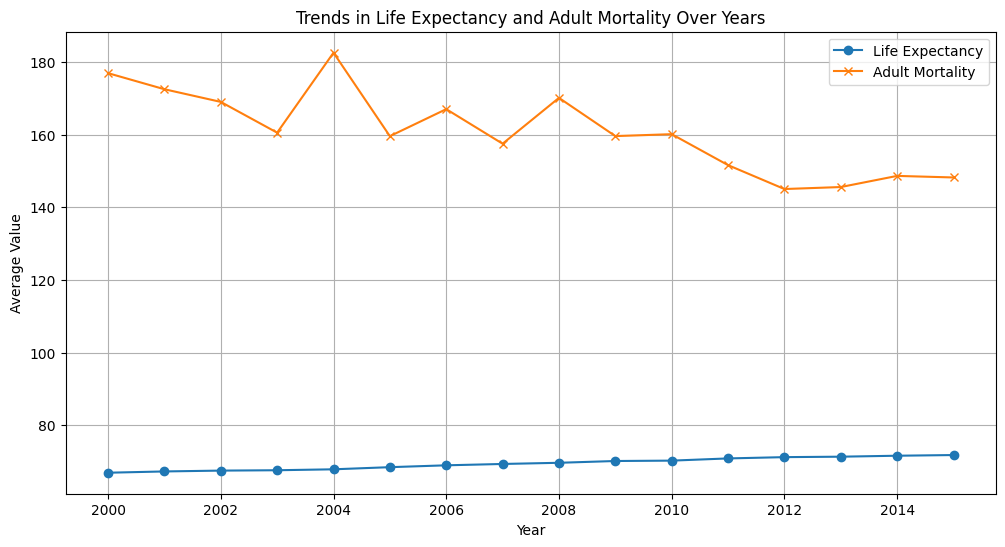

In [16]:

# Calculate average life expectancy and adult mortality over the years
yearly_stats = df1.groupby('Year')[['Life_expectancy', 'Adult_Mortality']].mean()

# Plotting trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats.index, yearly_stats['Life_expectancy'], marker='o', label='Life Expectancy')
plt.plot(yearly_stats.index, yearly_stats['Adult_Mortality'], marker='x', label='Adult Mortality')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Trends in Life Expectancy and Adult Mortality Over Years')
plt.legend()
plt.grid(True)
plt.show()

# TOP 10 MOST POPULATED AND LEAST POPULATED COUNTRIES OVER THE TIME ACCORDING TO DATA SET

In [17]:
# Step 1: Filter out countries with Population = 0
df_filtered = df1[df1['Population'] > 0]

# Step 2: Group by 'Country' and calculate the average population
average_population = df_filtered.groupby('Country')['Population'].mean().reset_index()

# Step 3: Sort by average population to find the most and least populated countries
most_populated_country = average_population.sort_values(by='Population', ascending=False).head(10)
least_populated_country = average_population.sort_values(by='Population').head(10)

print("Most populated country over time:")
print(most_populated_country)

print("\nLeast populated country over time:")
print(least_populated_country)

Most populated country over time:
                Country  Population
59                India 421,467,691
60            Indonesia 116,555,259
17               Brazil  88,128,071
96              Nigeria  70,877,003
98             Pakistan  69,027,962
107  Russian Federation  59,762,086
42             Ethiopia  43,950,761
9            Bangladesh  42,985,164
48              Germany  38,757,347
103         Philippines  37,265,400

Least populated country over time:
                   Country  Population
80                Maldives       3,334
47                 Georgia      10,152
119              Sri Lanka      10,845
129                  Tonga      26,590
63                  Israel      27,863
70                Kiribati      35,920
113             Seychelles      61,544
66                   Japan      97,384
110  Sao Tome and Principe     115,186
138                Vanuatu     123,096


# TOP 10 HIGHEST AND LEAST LIFE EXPECTENCY (AVERAGE) COUNTRIES OVER THE TIME 

In [18]:
# Step 1: Filter out countries with Life_expectancy = 0 if necessary
df_filtered = df1[df1['Life_expectancy'] > 0]

# Step 2: Group by 'Country' and calculate the average life expectancy
average_life_expectancy = df_filtered.groupby('Country')['Life_expectancy'].mean().reset_index()

# Step 3: Sort by average life expectancy to find the highest and least life expectancy countries
highest_life_expectancy_country = average_life_expectancy.sort_values(by='Life_expectancy', ascending=False).head(10)
least_life_expectancy_country = average_life_expectancy.sort_values(by='Life_expectancy').head(10)

# Displaying results
print("Country with the highest average life expectancy over time:")
print(highest_life_expectancy_country)

print("\nCountry with the least average life expectancy over time:")
print(least_life_expectancy_country)

Country with the highest average life expectancy over time:
         Country  Life_expectancy
72         Japan               83
136       Sweden               83
64       Iceland               82
137  Switzerland               82
50        France               82
70         Italy               82
132        Spain               82
7      Australia               82
106       Norway               82
28        Canada               82

Country with the least average life expectancy over time:
                      Country  Life_expectancy
126              Sierra Leone               46
29   Central African Republic               49
80                    Lesotho               49
3                      Angola               49
86                     Malawi               50
30                       Chad               50
155                  Zimbabwe               50
135                 Swaziland               51
105                   Nigeria               51
97                 Mozambique        

# MOST POPULATED CONTINENTS OVER TIME

In [19]:

# Step 1: Filter out rows with Population = 0 if necessary
df_filtered = df1[df1['Population'] > 0]

# Step 2: Group by 'Continent' and sum the population
total_population_by_continent = df_filtered.groupby('Continent')['Population'].sum().reset_index()

# Step 3: Sort by total population to find the most populated continent
most_populated_continent = total_population_by_continent.sort_values(by='Population', ascending=False).head(8)

print("Most populated continent over time:")
print(most_populated_continent)

Most populated continent over time:
       Continent     Population
1           Asia 13,916,908,600
0         Africa  5,894,051,416
4         Europe  3,669,000,079
7  South America  2,998,571,597
5  North America  1,070,121,763
2    Asia/Europe    956,355,808
6        Oceania     89,836,037
3      Australia     73,392,158


# HIGHEST LIFE EXPECTENCY CONTINENTS OVER TIME 

In [20]:

# Step 1: Filter out rows with Life_expectancy = 0 if necessary
df_filtered = df1[df1['Life_expectancy'] > 0]

# Step 2: Group by 'Continent' and calculate the average life expectancy
average_life_expectancy_by_continent = df_filtered.groupby('Continent')['Life_expectancy'].mean().reset_index()

# Step 3: Sort by average life expectancy to find the highest and least life expectancy continents
life_expectancy_continent = average_life_expectancy_by_continent.sort_values(by='Life_expectancy', ascending=False).head(8)


# Displaying results
print("Continent with the average life expectancy over time:")
print(life_expectancy_continent)


Continent with the average life expectancy over time:
       Continent  Life_expectancy
3      Australia               82
4         Europe               78
5  North America               74
7  South America               73
1           Asia               71
2    Asia/Europe               71
6        Oceania               70
0         Africa               58


# Top 10 countries with the highest average alcohol consumption over time

In [21]:

# Step 1: Filter out rows with Alcohol consumption data if necessary
df_filtered = df1[df1['Alcohol'] > 0]

# Step 2: Group by 'Country' and calculate the average alcohol consumption
average_alcohol_consumption = df_filtered.groupby('Country')['Alcohol'].mean().reset_index()

# Step 3: Sort by average alcohol consumption to find the countries with the highest consumption
top_alcohol_consuming_countries = average_alcohol_consumption.sort_values(by='Alcohol', ascending=False).head(10)

# Displaying results
print("Top 10 countries with the highest average alcohol consumption over time:")
print(top_alcohol_consuming_countries)

Top 10 countries with the highest average alcohol consumption over time:
        Country  Alcohol
13      Belarus       13
68      Ireland       13
83    Lithuania       13
36      Croatia       12
50       France       12
8       Austria       12
115    Portugal       12
84   Luxembourg       12
53      Germany       12
63      Hungary       11


# FREQUENCY COUNT FOR COUNTRY , CONTINENT, AND STATUS

In [22]:

# Frequency count for 'Country'
country_counts = df1['Country'].value_counts()

# Frequency count for 'Continent'
continent_counts = df1['Continent'].value_counts()

# Frequency count for 'Status'
status_counts = df1['Status'].value_counts()

# Displaying frequency counts
print("Frequency count for Country:")
print(country_counts)

print("\nFrequency count for Continent:")
print(continent_counts)

print("\nFrequency count for Status:")
print(status_counts)

Frequency count for Country:
Country
Afghanistan             16
Morocco                 16
Myanmar                 16
Namibia                 16
Nepal                   16
                        ..
Eritrea                 12
Iraq                    12
Libya                   12
Syrian Arab Republic     8
Somalia                  3
Name: count, Length: 156, dtype: int64

Frequency count for Continent:
Continent
Africa           698
Asia             612
Europe           544
North America    256
South America    176
Oceania          127
Asia/Europe       32
Australia         16
Name: count, dtype: int64

Frequency count for Status:
Status
Developing    2013
Developed      448
Name: count, dtype: int64


# Distribution Analysis:

## Histograms and box plots for Life_expectancy, Alcohol, BMI, GDP, etc., to understand their distributions and identify any outliers.

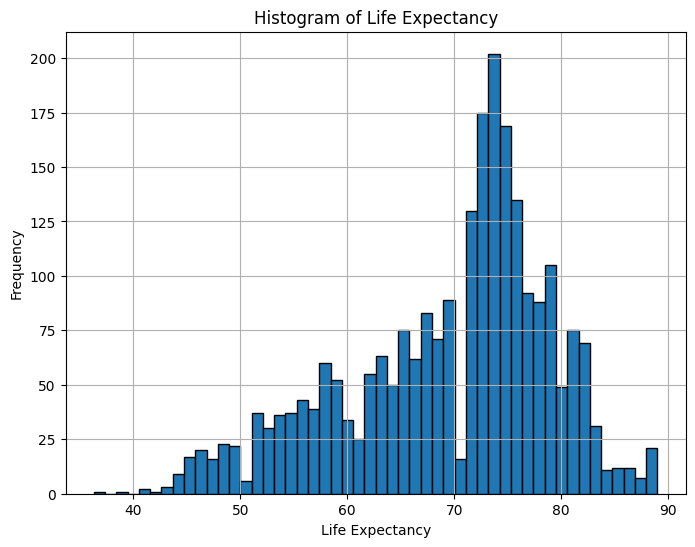

In [23]:

# Histogram for Life_expectancy
plt.figure(figsize=(8, 6))
plt.hist(df1['Life_expectancy'], bins=50, edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.grid(True)
plt.show()

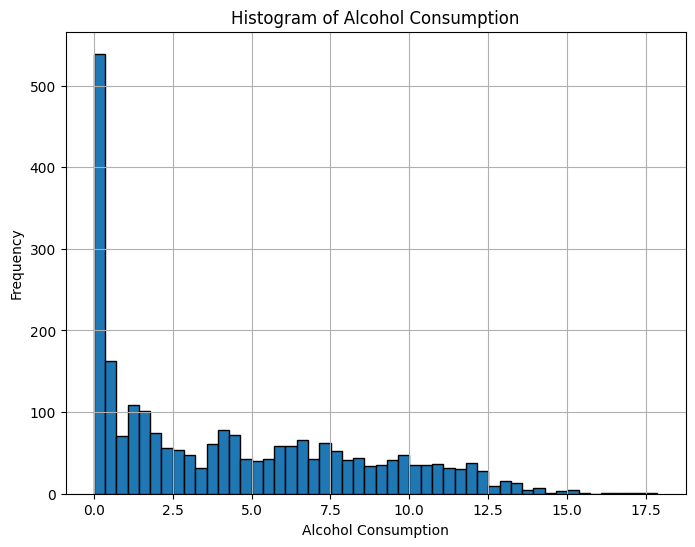

In [24]:
# Histogram for Alcohol
plt.figure(figsize=(8, 6))
plt.hist(df1['Alcohol'], bins=50, edgecolor='black')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Consumption')
plt.grid(True)
plt.show()


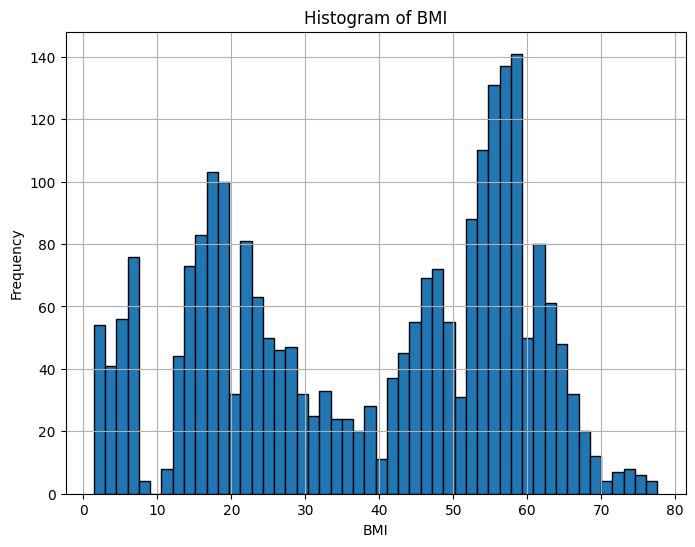

In [25]:
# Histogram for BMI
plt.figure(figsize=(8, 6))
plt.hist(df1['BMI'], bins=50, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.grid(True)
plt.show()


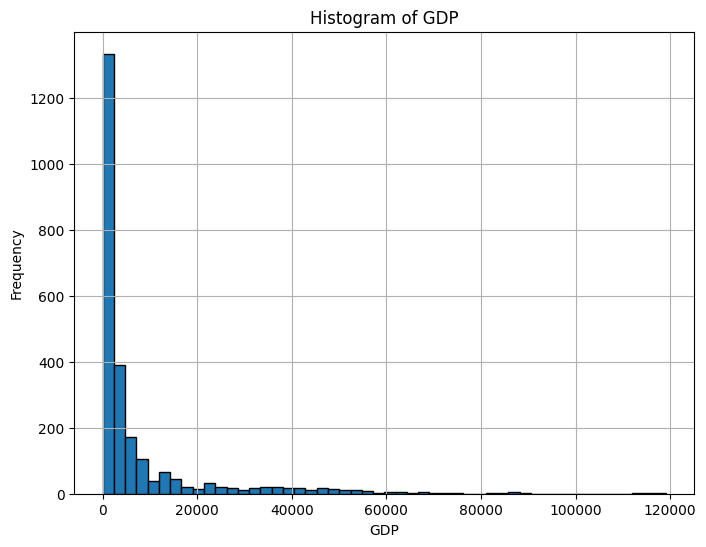

In [26]:
# Histogram for GDP
plt.figure(figsize=(8, 6))
plt.hist(df1['GDP'], bins=50, edgecolor='black')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.title('Histogram of GDP')
plt.grid(True)
plt.show()


# Trend Analysis

## Line plots showing how indicators such as Life_expectancy, Alcohol, GDP, and Population change over time (2000-2015).

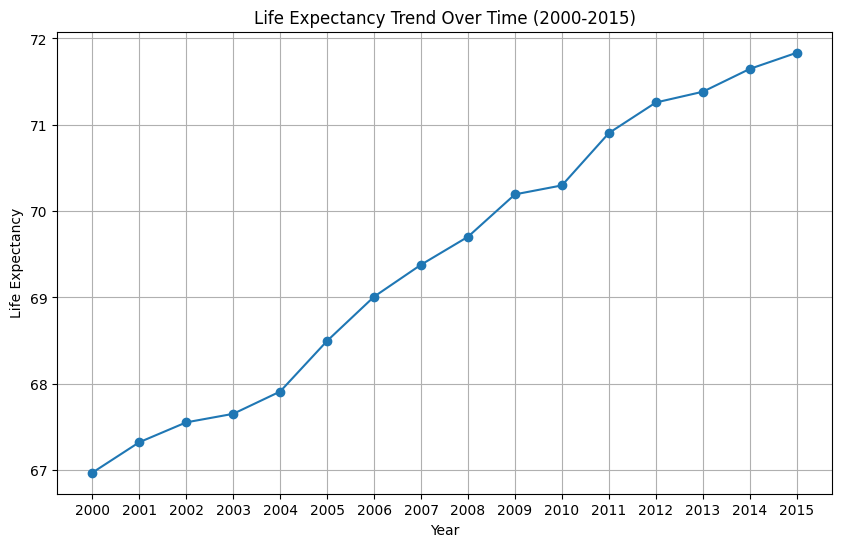

In [27]:

# Grouping by Year and calculating mean Life_expectancy
life_expectancy_trend = df1.groupby('Year')['Life_expectancy'].mean()

# Line plot for Life_expectancy
plt.figure(figsize=(10, 6))
plt.plot(life_expectancy_trend.index, life_expectancy_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trend Over Time (2000-2015)')
plt.grid(True)
plt.xticks(life_expectancy_trend.index)  # Ensure all years are displayed on x-axis
plt.show()

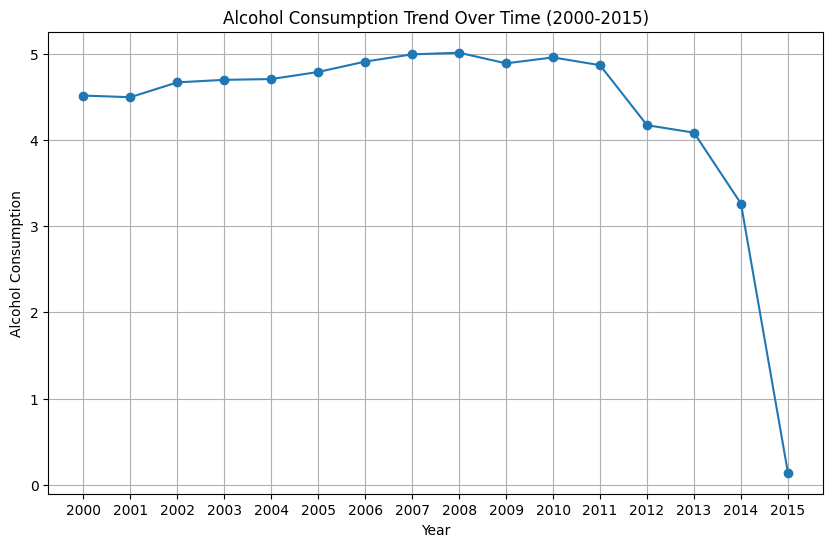

In [28]:
# Grouping by Year and calculating mean Alcohol consumption
alcohol_trend = df1.groupby('Year')['Alcohol'].mean()

# Line plot for Alcohol
plt.figure(figsize=(10, 6))
plt.plot(alcohol_trend.index, alcohol_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.title('Alcohol Consumption Trend Over Time (2000-2015)')
plt.grid(True)
plt.xticks(alcohol_trend.index)  # Ensure all years are displayed on x-axis
plt.show()


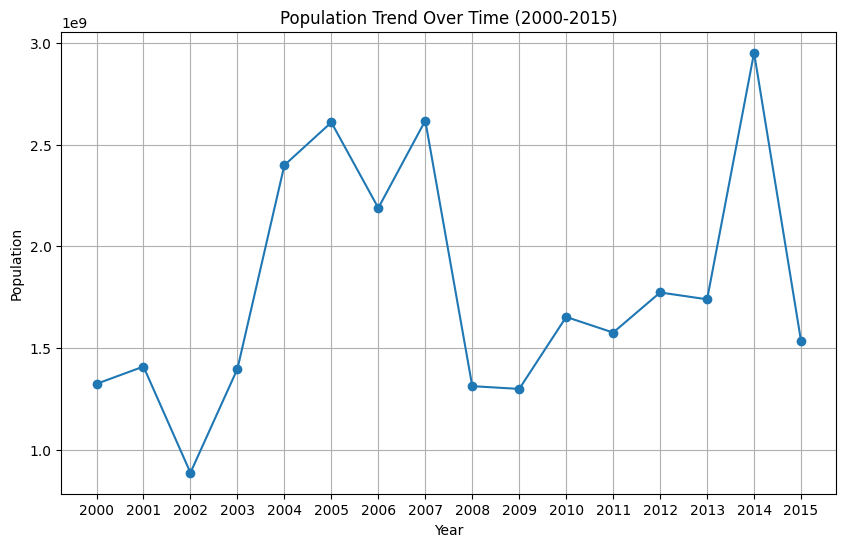

In [29]:
# Grouping by Year and calculating sum of Population (assuming cumulative)
population_trend = df1.groupby('Year')['Population'].sum()

# Line plot for Population
plt.figure(figsize=(10, 6))
plt.plot(population_trend.index, population_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend Over Time (2000-2015)')
plt.grid(True)
plt.xticks(population_trend.index)  # Ensure all years are displayed on x-axis
plt.show()


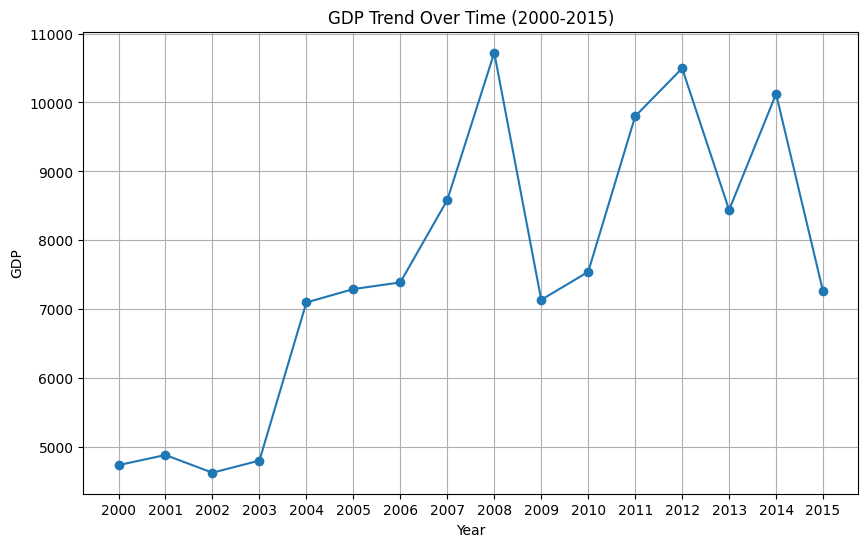

In [30]:
# Grouping by Year and calculating mean GDP
gdp_trend = df1.groupby('Year')['GDP'].mean()

# Line plot for GDP
plt.figure(figsize=(10, 6))
plt.plot(gdp_trend.index, gdp_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Trend Over Time (2000-2015)')
plt.grid(True)
plt.xticks(gdp_trend.index)  # Ensure all years are displayed on x-axis
plt.show()


# Comparative Analysis

## Comparisons by Country or Continent:
#### Compare average Life_expectancy, Alcohol consumption, GDP, etc., across different countries or continents.
#### Identify countries or continents that perform better or worse in specific indicators.

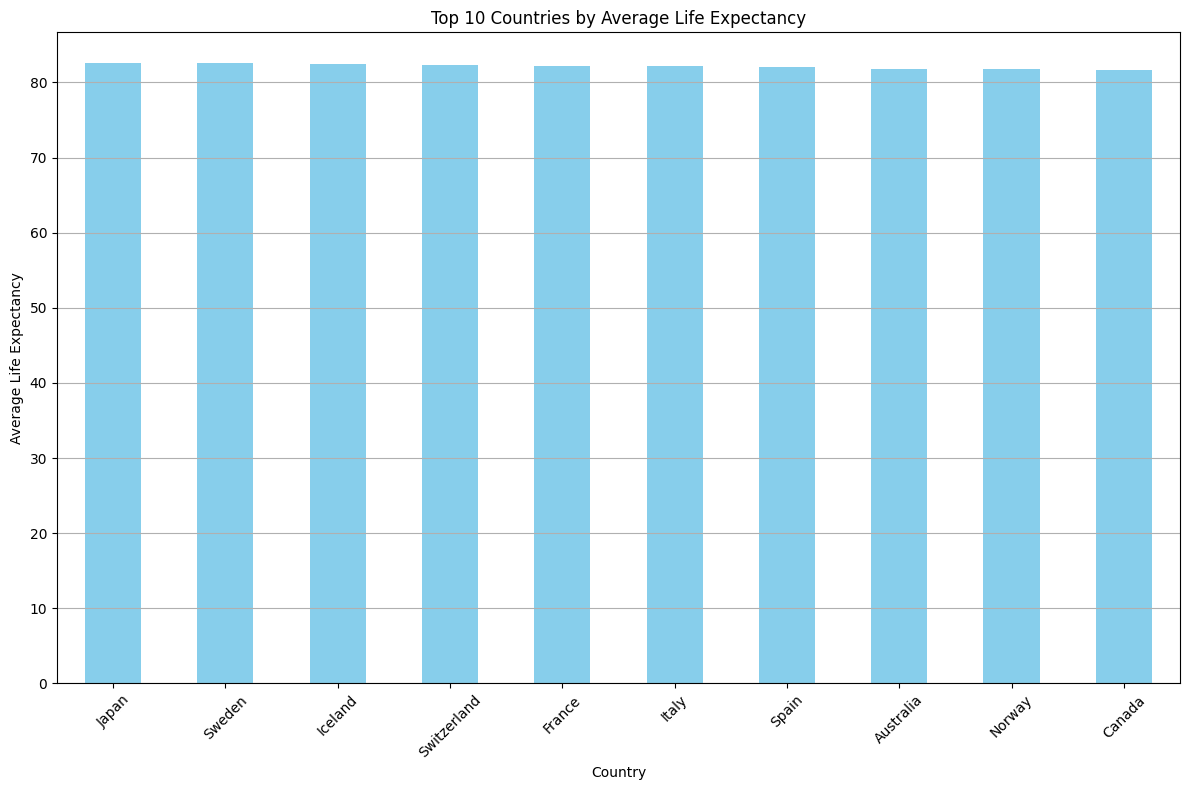

In [31]:

# Grouping by Country and calculating mean Life_expectancy
avg_life_expectancy_country = df1.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=False).head(10)

# Bar plot for Average Life_expectancy by Country
plt.figure(figsize=(12, 8))
avg_life_expectancy_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Top 10 Countries by Average Life Expectancy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

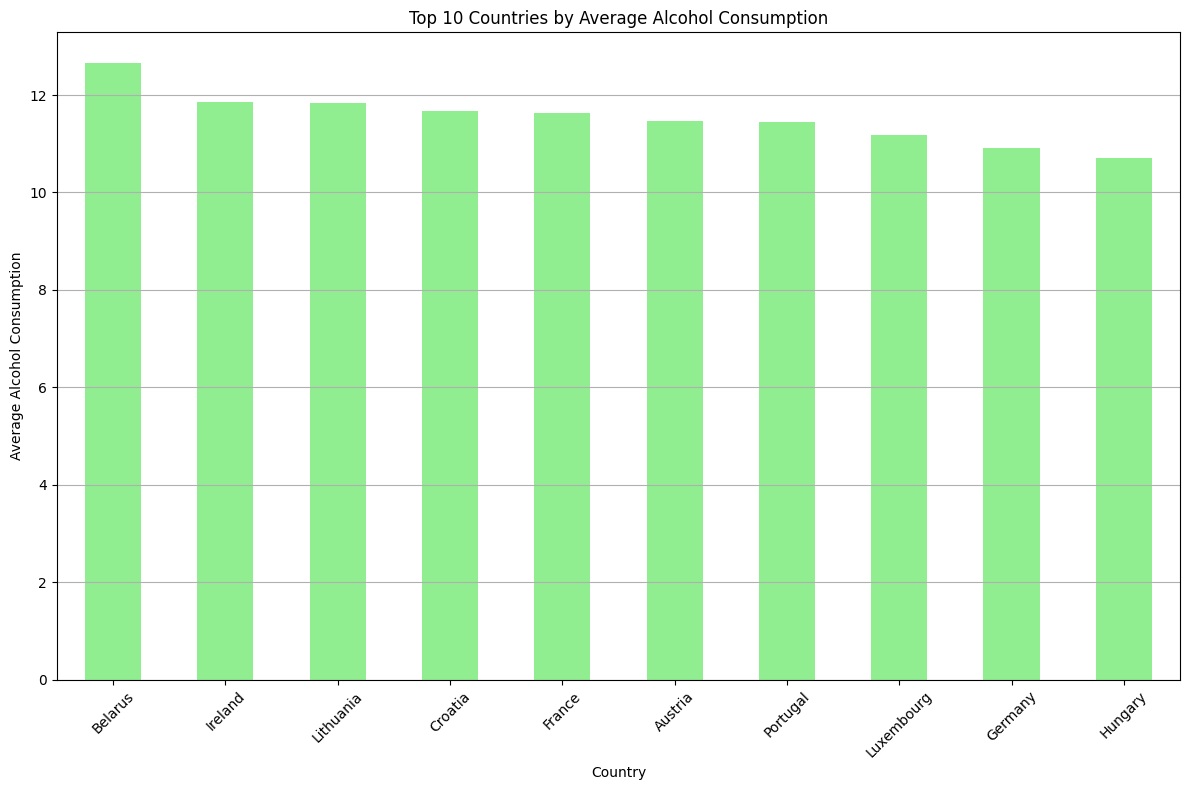

In [32]:
# Grouping by Country and calculating mean Alcohol consumption
avg_alcohol_country = df1.groupby('Country')['Alcohol'].mean().sort_values(ascending=False).head(10)

# Bar plot for Average Alcohol consumption by Country
plt.figure(figsize=(12, 8))
avg_alcohol_country.plot(kind='bar', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Average Alcohol Consumption')
plt.title('Top 10 Countries by Average Alcohol Consumption')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


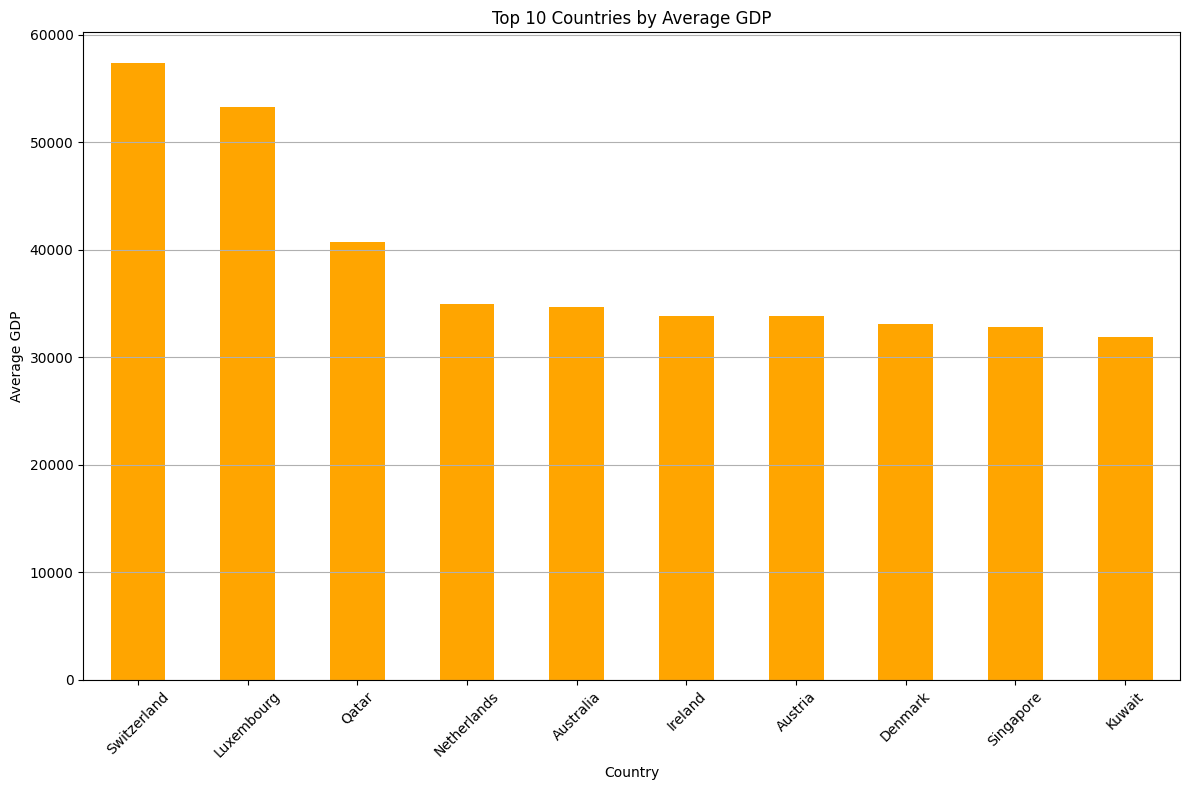

In [33]:
# Grouping by Country and calculating mean GDP
avg_gdp_country = df1.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(10)

# Bar plot for Average GDP by Country
plt.figure(figsize=(12, 8))
avg_gdp_country.plot(kind='bar', color='orange')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.title('Top 10 Countries by Average GDP')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Comparative Analysis by Continent

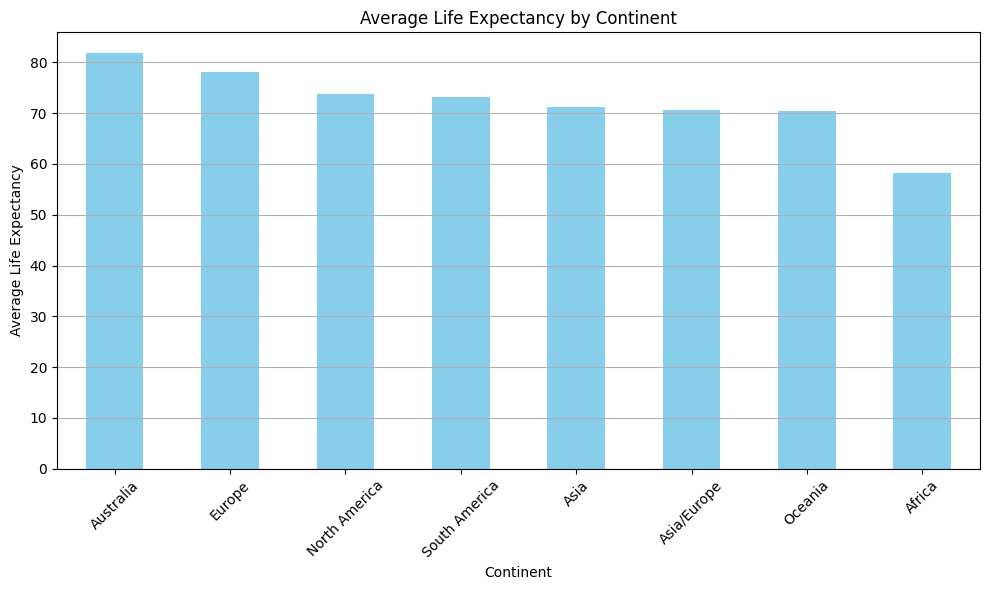

In [34]:
# Grouping by Continent and calculating mean Life_expectancy
avg_life_expectancy_continent = df1.groupby('Continent')['Life_expectancy'].mean().sort_values(ascending=False)

# Bar plot for Average Life_expectancy by Continent
plt.figure(figsize=(10, 6))
avg_life_expectancy_continent.plot(kind='bar', color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


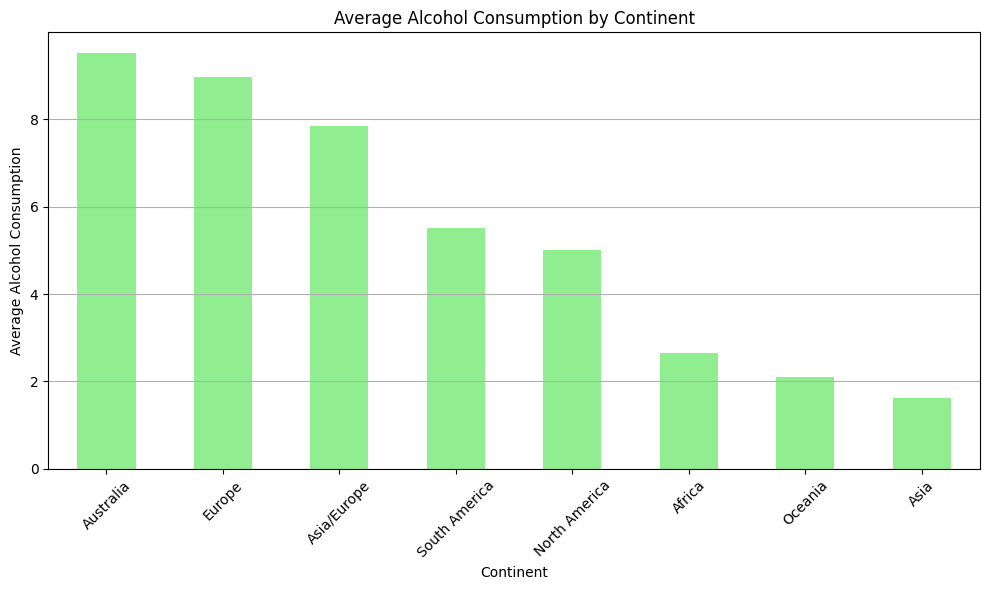

In [35]:
# Grouping by Continent and calculating mean Alcohol consumption
avg_alcohol_continent = df1.groupby('Continent')['Alcohol'].mean().sort_values(ascending=False)

# Bar plot for Average Alcohol consumption by Continent
plt.figure(figsize=(10, 6))
avg_alcohol_continent.plot(kind='bar', color='lightgreen')
plt.xlabel('Continent')
plt.ylabel('Average Alcohol Consumption')
plt.title('Average Alcohol Consumption by Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


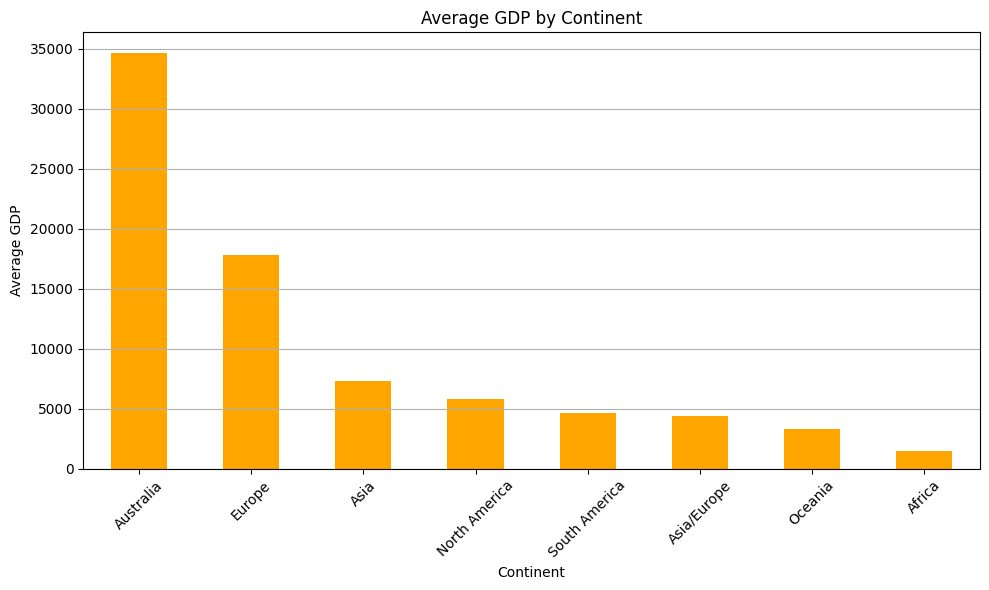

In [36]:
# Grouping by Continent and calculating mean GDP
avg_gdp_continent = df1.groupby('Continent')['GDP'].mean().sort_values(ascending=False)

# Bar plot for Average GDP by Continent
plt.figure(figsize=(10, 6))
avg_gdp_continent.plot(kind='bar', color='orange')
plt.xlabel('Continent')
plt.ylabel('Average GDP')
plt.title('Average GDP by Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Status-Based Analysis:

## Compare health indicators such as Life_expectancy, Adult_Mortality, and infant_deaths between countries with different statuses (e.g., developing vs. developed).

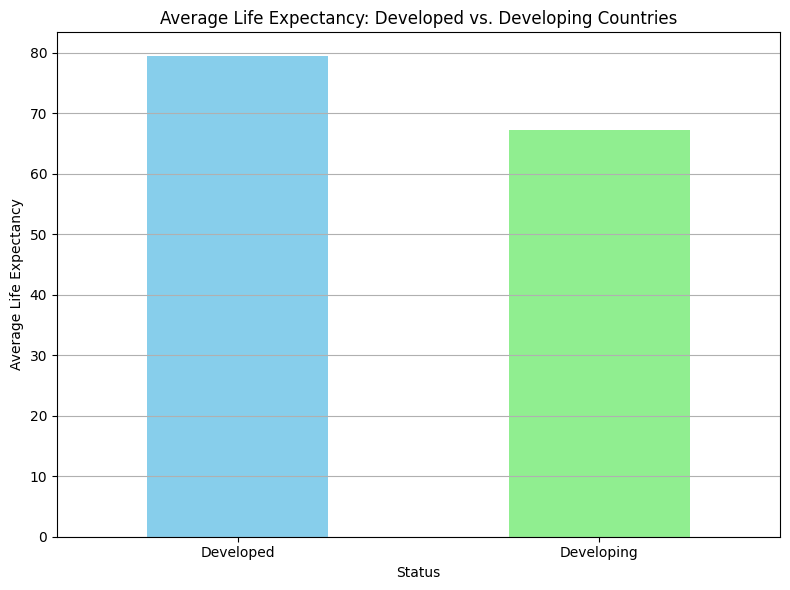

In [37]:

# Grouping by Status and calculating mean Life_expectancy
avg_life_expectancy_status = df1.groupby('Status')['Life_expectancy'].mean()

# Bar plot for Average Life_expectancy by Status
plt.figure(figsize=(8, 6))
avg_life_expectancy_status.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Status')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy: Developed vs. Developing Countries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

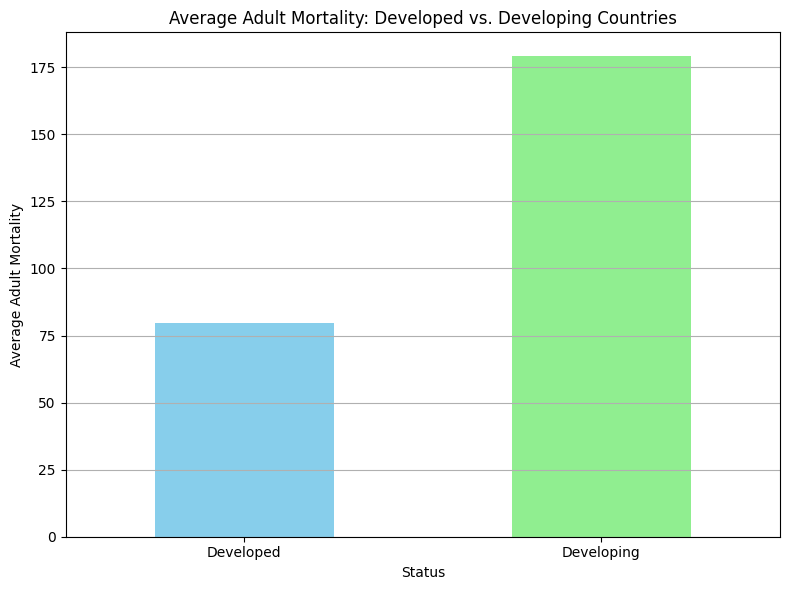

In [38]:
# Grouping by Status and calculating mean Adult_Mortality
avg_adult_mortality_status = df1.groupby('Status')['Adult_Mortality'].mean()

# Bar plot for Average Adult_Mortality by Status
plt.figure(figsize=(8, 6))
avg_adult_mortality_status.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Status')
plt.ylabel('Average Adult Mortality')
plt.title('Average Adult Mortality: Developed vs. Developing Countries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


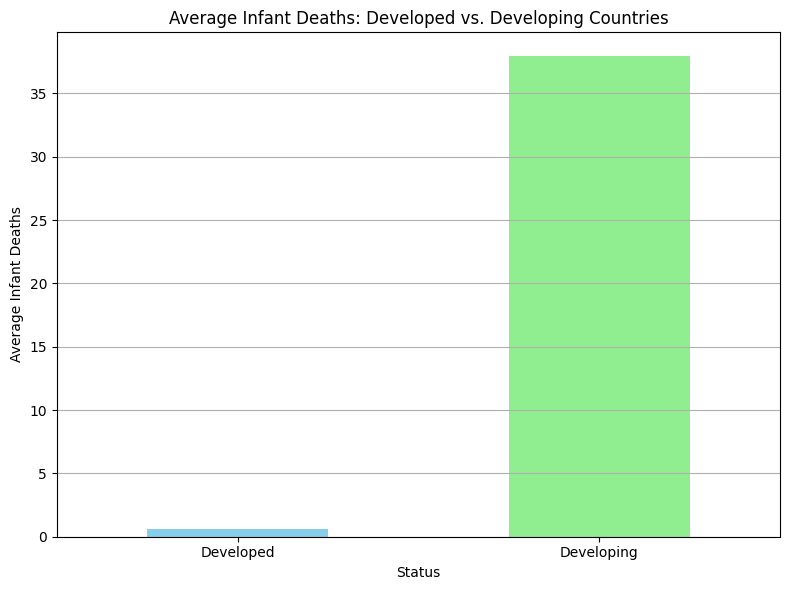

In [39]:
# Grouping by Status and calculating mean infant_deaths
avg_infant_deaths_status = df1.groupby('Status')['infant_deaths'].mean()

# Bar plot for Average infant_deaths by Status
plt.figure(figsize=(8, 6))
avg_infant_deaths_status.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Status')
plt.ylabel('Average Infant Deaths')
plt.title('Average Infant Deaths: Developed vs. Developing Countries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Correlation and Relationship Analysis

## Correlation Analysis:

#### Correlation matrix to identify relationships between variables such as Life_expectancy, Alcohol, BMI, GDP, Schooling, etc.


Correlation Matrix:
                 Life_expectancy  Alcohol  BMI  GDP  Schooling
Life_expectancy                1        0    1    0          1
Alcohol                        0        1    0    0          1
BMI                            1        0    1    0          1
GDP                            0        0    0    1          0
Schooling                      1        1    1    0          1


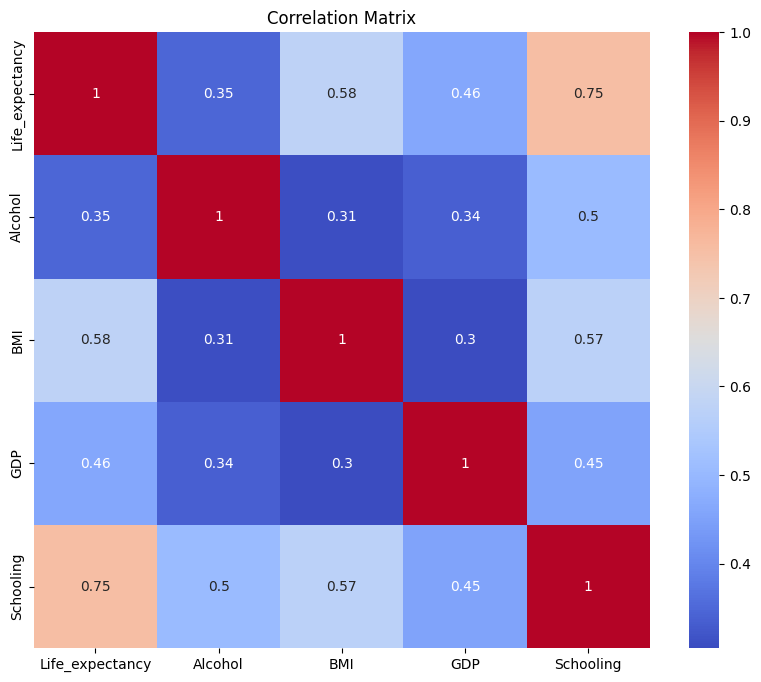

In [40]:
# Selecting relevant columns for correlation analysis
cols_to_correlate = ['Life_expectancy', 'Alcohol', 'BMI', 'GDP', 'Schooling']
correlation_matrix = df1[cols_to_correlate].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Scatter Plots for Relationships

#### Scatter plots to visualize correlations between pairs of variables, e.g., GDP vs. Life_expectancy.

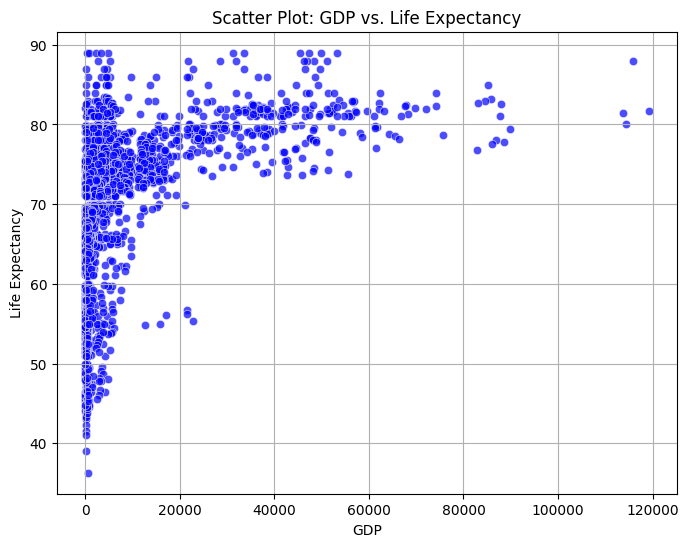

In [41]:
# Scatter plot for GDP vs. Life_expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP', y='Life_expectancy', data=df1, alpha=0.7, marker='o', color='blue')
plt.title('Scatter Plot: GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


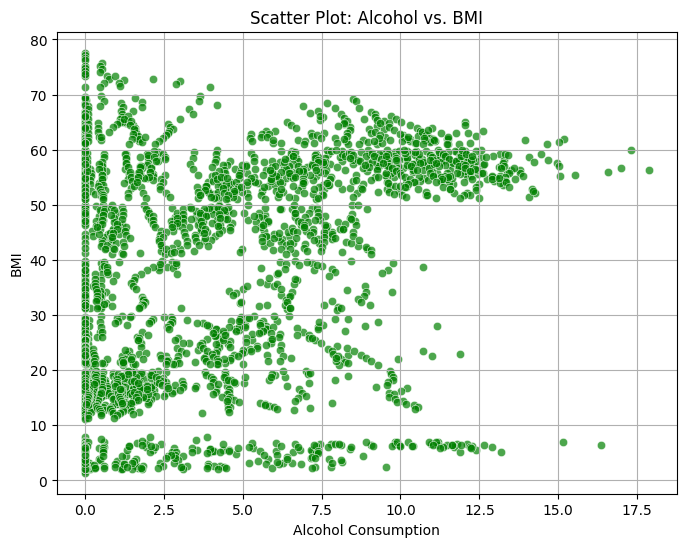

In [42]:
# Scatter plot for Alcohol vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alcohol', y='BMI', data=df1, alpha=0.7, marker='o', color='green')
plt.title('Scatter Plot: Alcohol vs. BMI')
plt.xlabel('Alcohol Consumption')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


# Child Health Indicators Analysis:

## Analyze infant_deaths, under_five_deaths, and Hepatitis_B vaccination rates across countries.

In [43]:

# Selecting relevant columns for analysis
child_health_indicators = ['infant_deaths', 'under_five_deaths', 'Hepatitis_B']
health_data = df1[['Country', 'Life_expectancy'] + child_health_indicators]

# Checking for missing values
print(health_data.isnull().sum())

# Summary statistics
health_data.describe()

Country              0
Life_expectancy      0
infant_deaths        0
under_five_deaths    0
Hepatitis_B          0
dtype: int64


Life_expectancy  infant_deaths  under_five_deaths  Hepatitis_B
count            2,461          2,461              2,461        2,461
mean                69             31                 43           83
std                 10            127                173           23
min                 36              0                  0            2
25%                 63              0                  0           82
50%                 72              2                  3           92
75%                 76             19                 24           96
max                 89          1,800              2,500           99

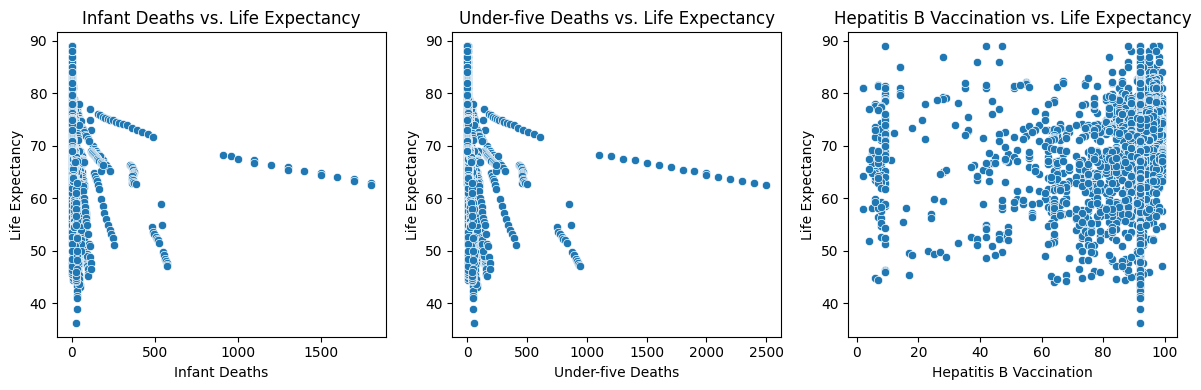

In [44]:

# Scatter plots: Life_expectancy vs. Child Health Indicators
plt.figure(figsize=(12, 4))

# Infant Deaths vs. Life Expectancy
plt.subplot(1, 3, 1)
sns.scatterplot(x='infant_deaths', y='Life_expectancy', data=health_data)
plt.title('Infant Deaths vs. Life Expectancy')
plt.xlabel('Infant Deaths')
plt.ylabel('Life Expectancy')

# Under-five Deaths vs. Life Expectancy
plt.subplot(1, 3, 2)
sns.scatterplot(x='under_five_deaths', y='Life_expectancy', data=health_data)
plt.title('Under-five Deaths vs. Life Expectancy')
plt.xlabel('Under-five Deaths')
plt.ylabel('Life Expectancy')

# Hepatitis B Vaccination vs. Life Expectancy
plt.subplot(1, 3, 3)
sns.scatterplot(x='Hepatitis_B', y='Life_expectancy', data=health_data)
plt.title('Hepatitis B Vaccination vs. Life Expectancy')
plt.xlabel('Hepatitis B Vaccination')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

Correlation Matrix:
                   Life_expectancy  infant_deaths  under_five_deaths  \
Life_expectancy                  1             -0                 -0   
infant_deaths                   -0              1                  1   
under_five_deaths               -0              1                  1   
Hepatitis_B                      0             -0                 -0   

                   Hepatitis_B  
Life_expectancy              0  
infant_deaths               -0  
under_five_deaths           -0  
Hepatitis_B                  1  


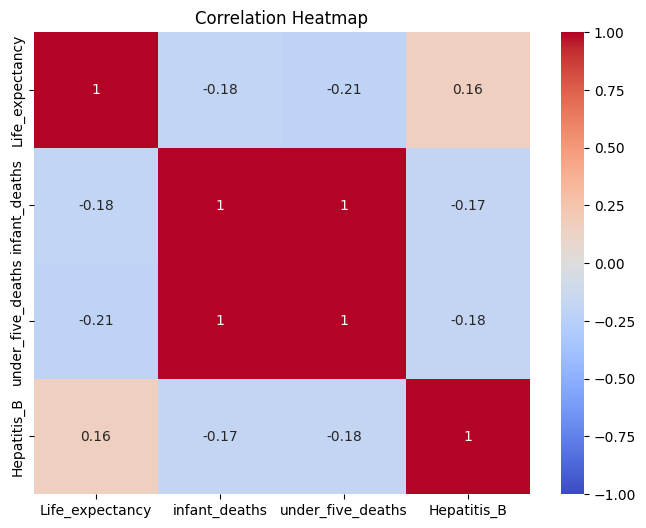

In [45]:
# Calculate correlation matrix
correlation_matrix = health_data[['Life_expectancy', 'infant_deaths', 'under_five_deaths', 'Hepatitis_B']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Nutritional Indicators:

## Analyze BMI and thinness indicators to understand nutritional status across countries.

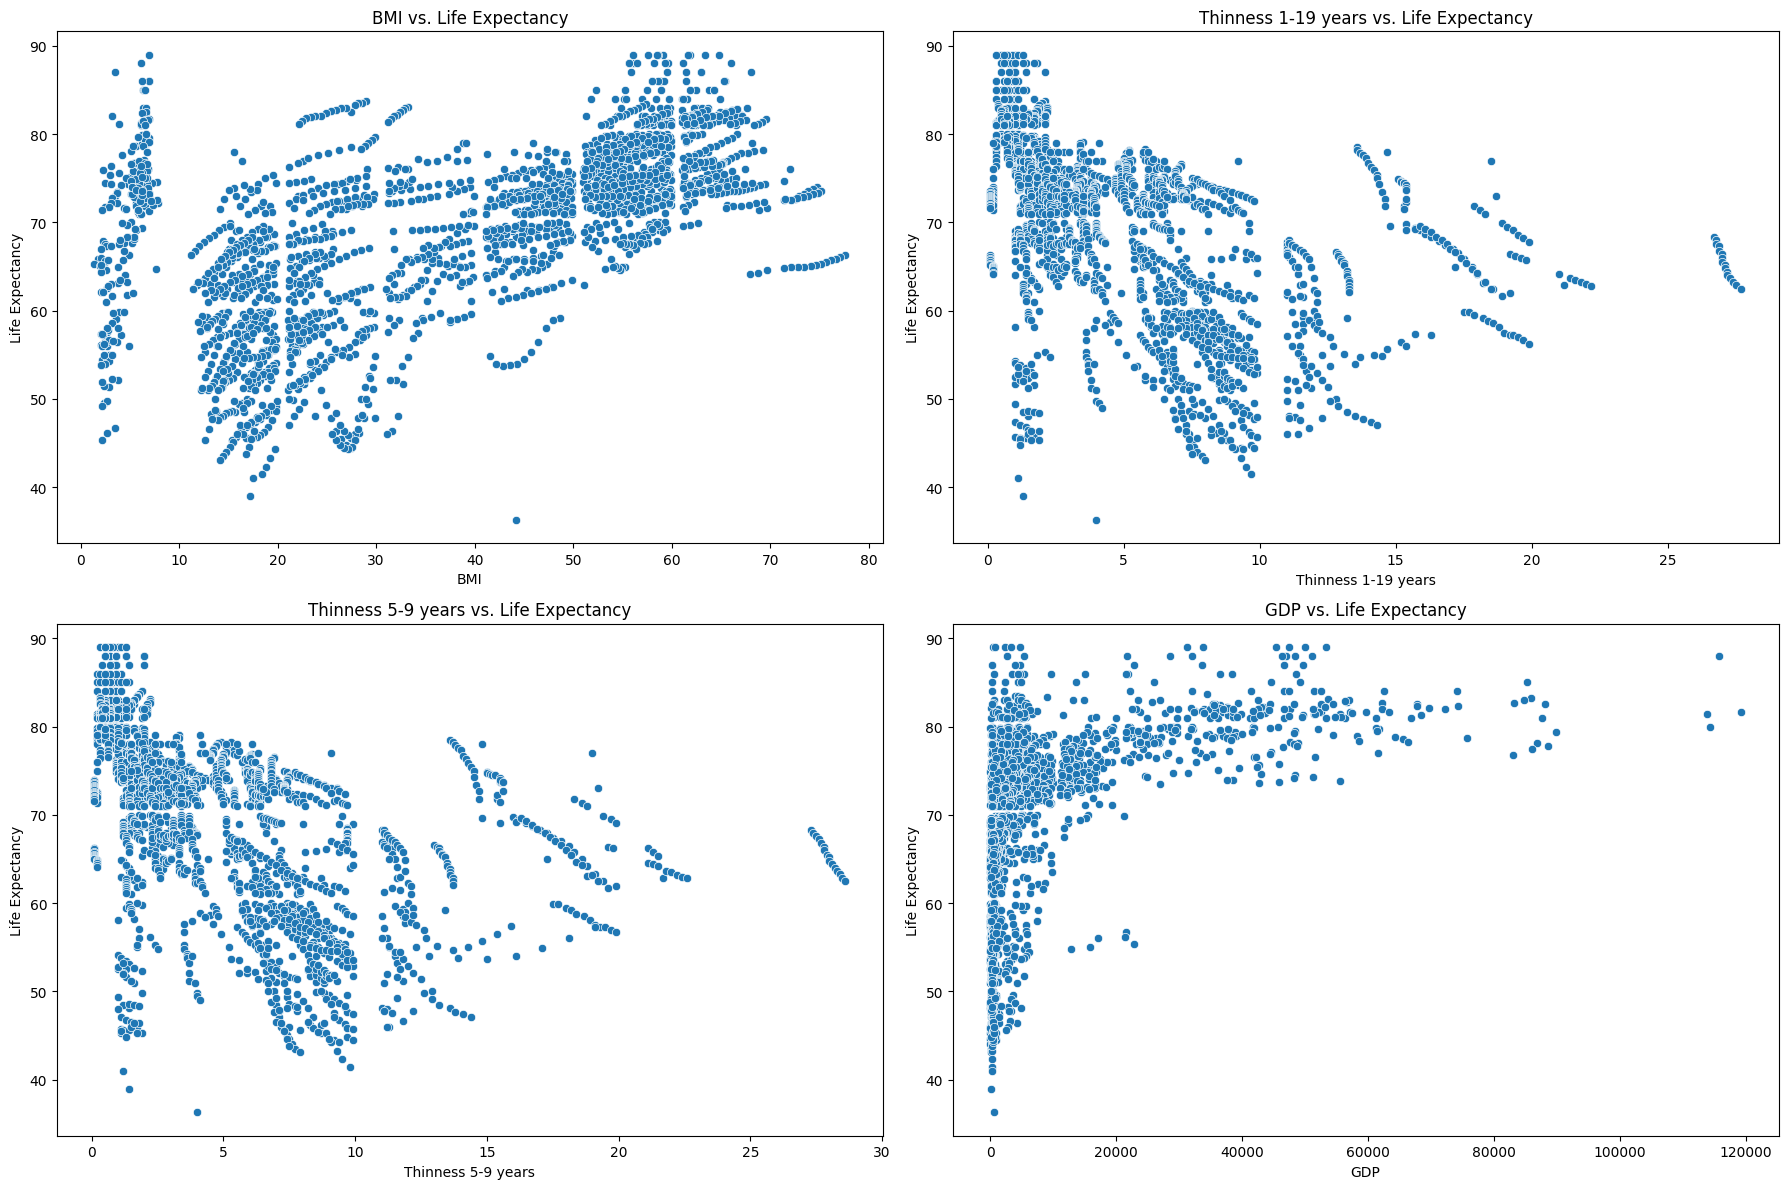

In [46]:
health_data1 = df1[['Country', 'Life_expectancy', 'BMI', 'thinness  1-19 years', 'thinness 5-9 years', 'GDP']]


# Scatter plots: Life_expectancy vs. Nutritional Indicators and GDP
plt.figure(figsize=(18, 12))

# BMI vs. Life Expectancy
plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='Life_expectancy', data=health_data1)
plt.title('BMI vs. Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

# Thinness 1-19 years vs. Life Expectancy
plt.subplot(2, 2, 2)
sns.scatterplot(x='thinness  1-19 years', y='Life_expectancy', data=health_data1)
plt.title('Thinness 1-19 years vs. Life Expectancy')
plt.xlabel('Thinness 1-19 years')
plt.ylabel('Life Expectancy')

# Thinness 5-9 years vs. Life Expectancy
plt.subplot(2, 2, 3)
sns.scatterplot(x='thinness 5-9 years', y='Life_expectancy', data=health_data1)
plt.title('Thinness 5-9 years vs. Life Expectancy')
plt.xlabel('Thinness 5-9 years')
plt.ylabel('Life Expectancy')

# GDP vs. Life Expectancy
plt.subplot(2, 2, 4)
sns.scatterplot(x='GDP', y='Life_expectancy', data=health_data1)
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

Correlation Matrix:
                      Life_expectancy  BMI  thinness  1-19 years  \
Life_expectancy                     1    1                    -0   
BMI                                 1    1                    -1   
thinness  1-19 years               -0   -1                     1   
thinness 5-9 years                 -0   -1                     1   
GDP                                 0    0                    -0   

                      thinness 5-9 years  GDP  
Life_expectancy                       -0    0  
BMI                                   -1    0  
thinness  1-19 years                   1   -0  
thinness 5-9 years                     1   -0  
GDP                                   -0    1  


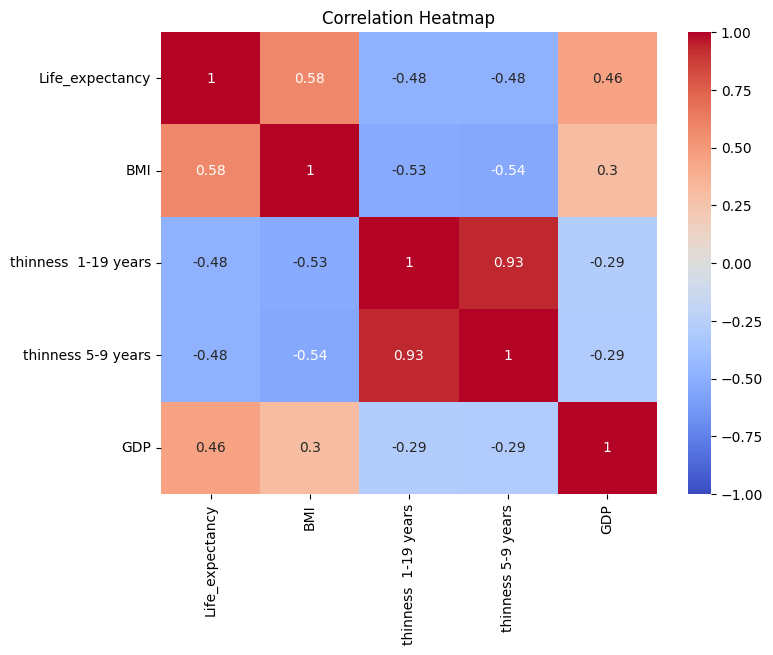

In [47]:
# Calculate correlation matrix
correlation_matrix = health_data1[['Life_expectancy', 'BMI', 'thinness  1-19 years', 'thinness 5-9 years', 'GDP']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Healthcare Expenditure:

## Analyze percentage_expenditure and Total_expenditure on health.

## Investigate the impact of healthcare expenditure on health outcomes like Life_expectancy.

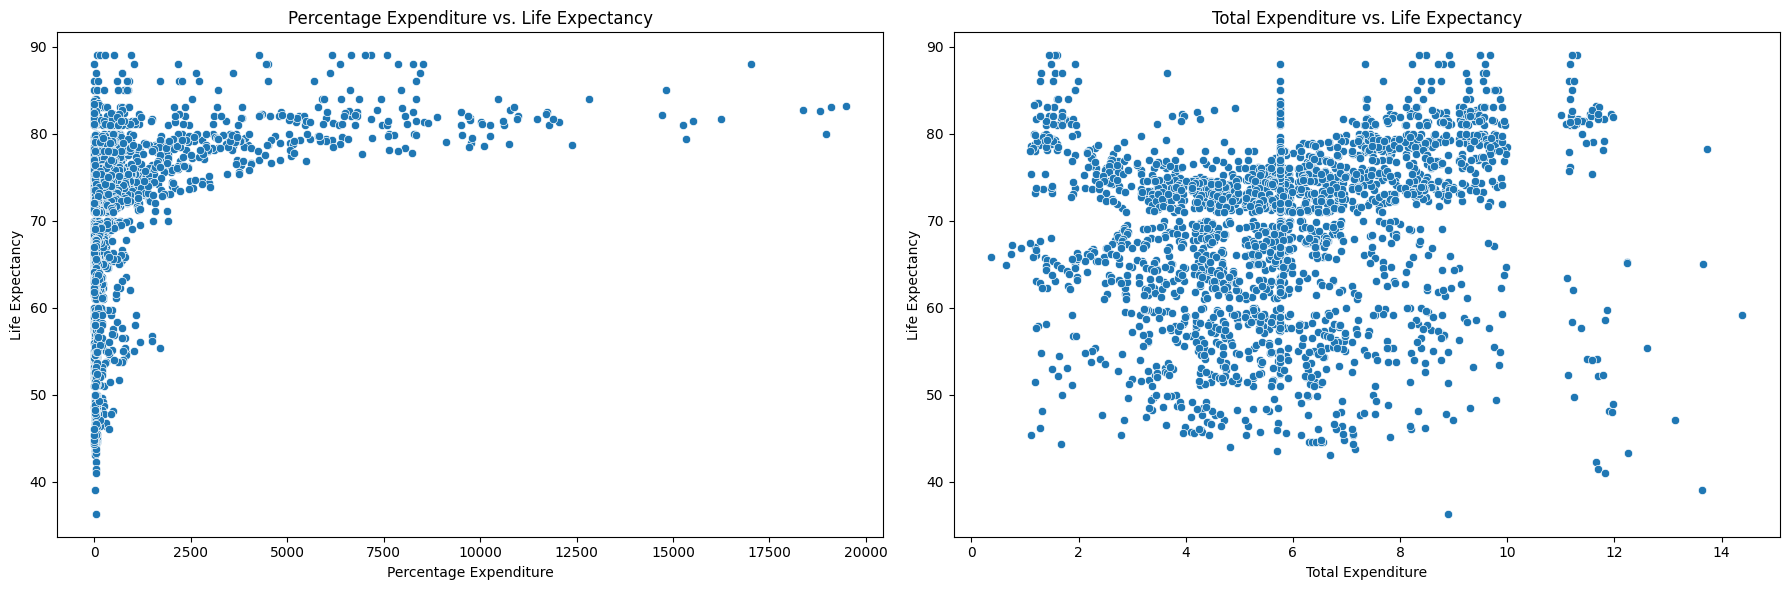

In [48]:

health_data2 = df1[['Country', 'Life_expectancy', 'percentage_expenditure', 'Total_expenditure']]


# Scatter plots: Life_expectancy vs. Healthcare Expenditure
plt.figure(figsize=(18, 6))

# Percentage Expenditure vs. Life Expectancy
plt.subplot(1, 2, 1)
sns.scatterplot(x='percentage_expenditure', y='Life_expectancy', data=health_data2)
plt.title('Percentage Expenditure vs. Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')

# Total Expenditure vs. Life Expectancy
plt.subplot(1, 2, 2)
sns.scatterplot(x='Total_expenditure', y='Life_expectancy', data=health_data2)
plt.title('Total Expenditure vs. Life Expectancy')
plt.xlabel('Total Expenditure')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()


Correlation Matrix:
                        Life_expectancy  percentage_expenditure  \
Life_expectancy                       1                       0   
percentage_expenditure                0                       1   
Total_expenditure                     0                       0   

                        Total_expenditure  
Life_expectancy                         0  
percentage_expenditure                  0  
Total_expenditure                       1  


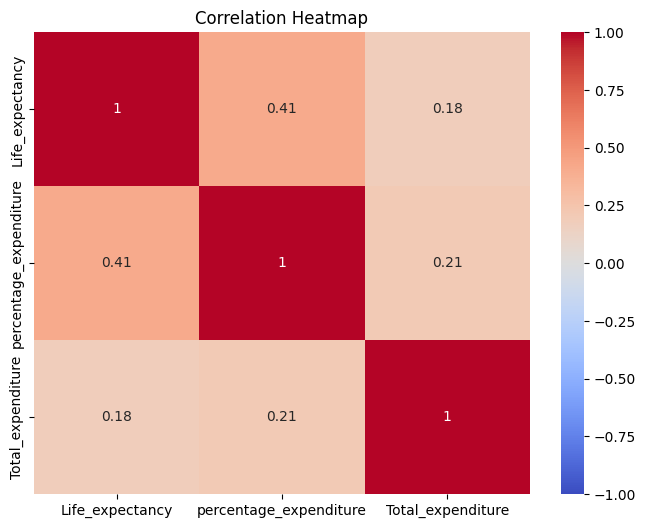

In [49]:
# Calculate correlation matrix
correlation_matrix = health_data2[['Life_expectancy', 'percentage_expenditure', 'Total_expenditure']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Education and Income:

## Analyze Schooling and Income_composition_of_resources across countries.


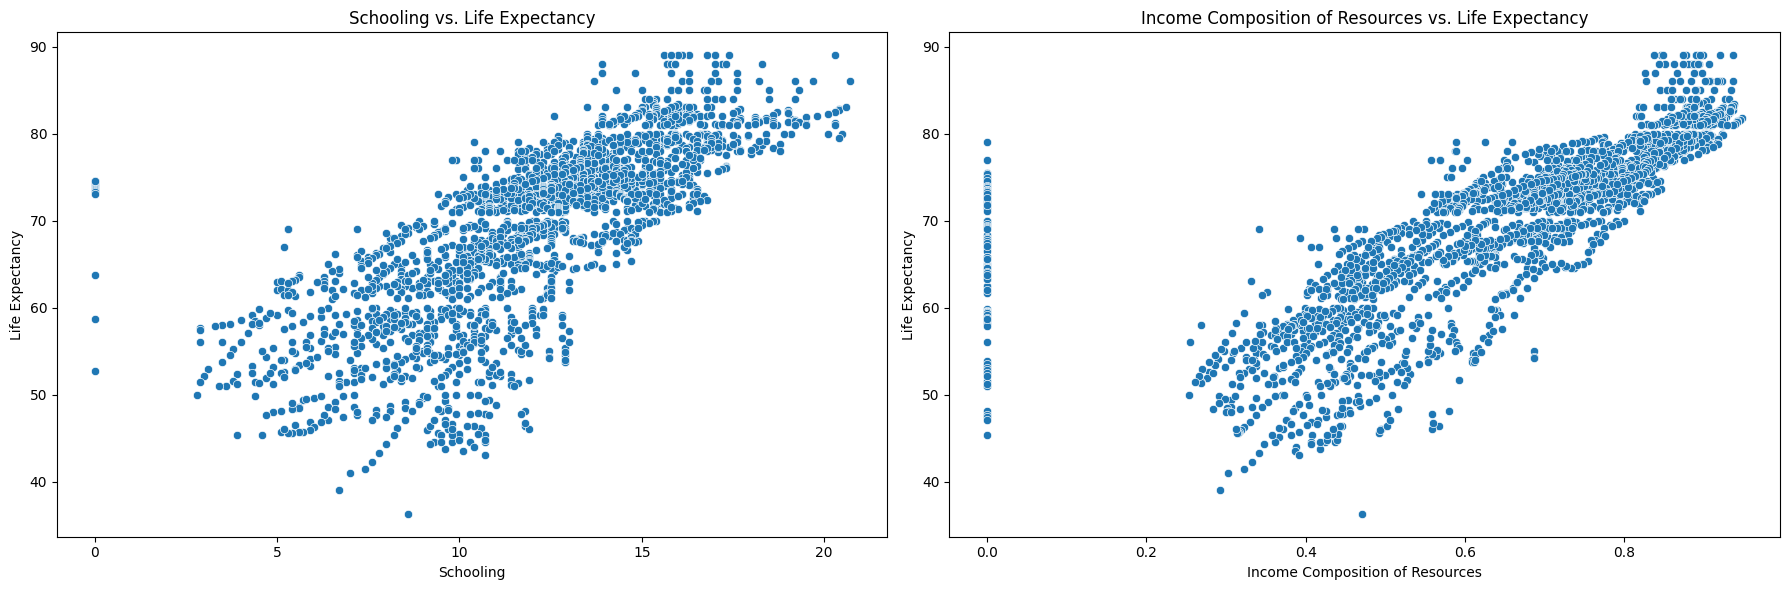

In [50]:

health_data3 = df1[['Country', 'Life_expectancy', 'Schooling', 'Income_composition_of_resources']]

# Scatter plots: Life_expectancy vs. Education and Income
plt.figure(figsize=(18, 6))

# Schooling vs. Life Expectancy
plt.subplot(1, 2, 1)
sns.scatterplot(x='Schooling', y='Life_expectancy', data=health_data3)
plt.title('Schooling vs. Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')

# Income Composition of Resources vs. Life Expectancy
plt.subplot(1, 2, 2)
sns.scatterplot(x='Income_composition_of_resources', y='Life_expectancy', data=health_data3)
plt.title('Income Composition of Resources vs. Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()



Correlation Matrix:
                                 Life_expectancy  Schooling  \
Life_expectancy                                1          1   
Schooling                                      1          1   
Income_composition_of_resources                1          1   

                                 Income_composition_of_resources  
Life_expectancy                                                1  
Schooling                                                      1  
Income_composition_of_resources                                1  


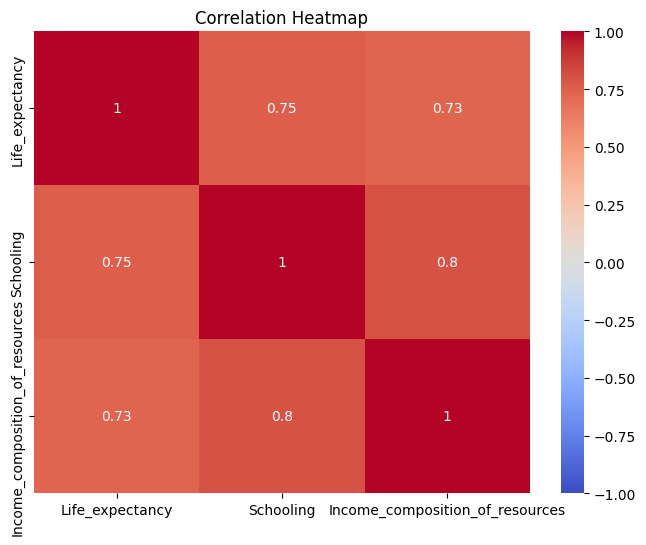

In [51]:
# Calculate correlation matrix
correlation_matrix = health_data3[['Life_expectancy', 'Schooling', 'Income_composition_of_resources']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Cluster Analysis:

## Perform clustering to group countries with similar health and demographic profiles.

# 1. Data Preparation:

In [52]:
# Ensure numeric columns for clustering
numeric_columns = ['Life_expectancy', 'Schooling', 'Income_composition_of_resources', 'GDP', 'Population', 'Alcohol']
clustering_data = df1[numeric_columns]

# Handling missing values (if any)
clustering_data = clustering_data.dropna()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# 2. Determine the Optimal Number of Clusters:

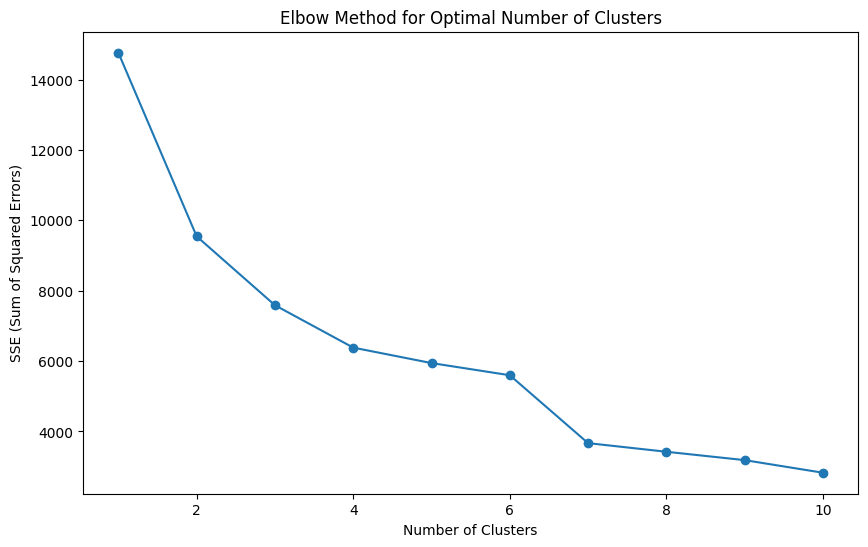

In [53]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# 3. Perform Clustering:

In [54]:
# Fit K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original data
df1['Cluster'] = clusters


# 4. Analyze Clusters:

Cluster Means:
         Life_expectancy  Schooling  Income_composition_of_resources    GDP  \
Cluster                                                                       
0                     59          9                                0  1,031   
1                     74         14                                1  4,593   
2                     81         16                                1 41,921   

         Population  Alcohol  
Cluster                       
0        17,734,199        2  
1         8,520,424        5  
2         7,514,471        8  


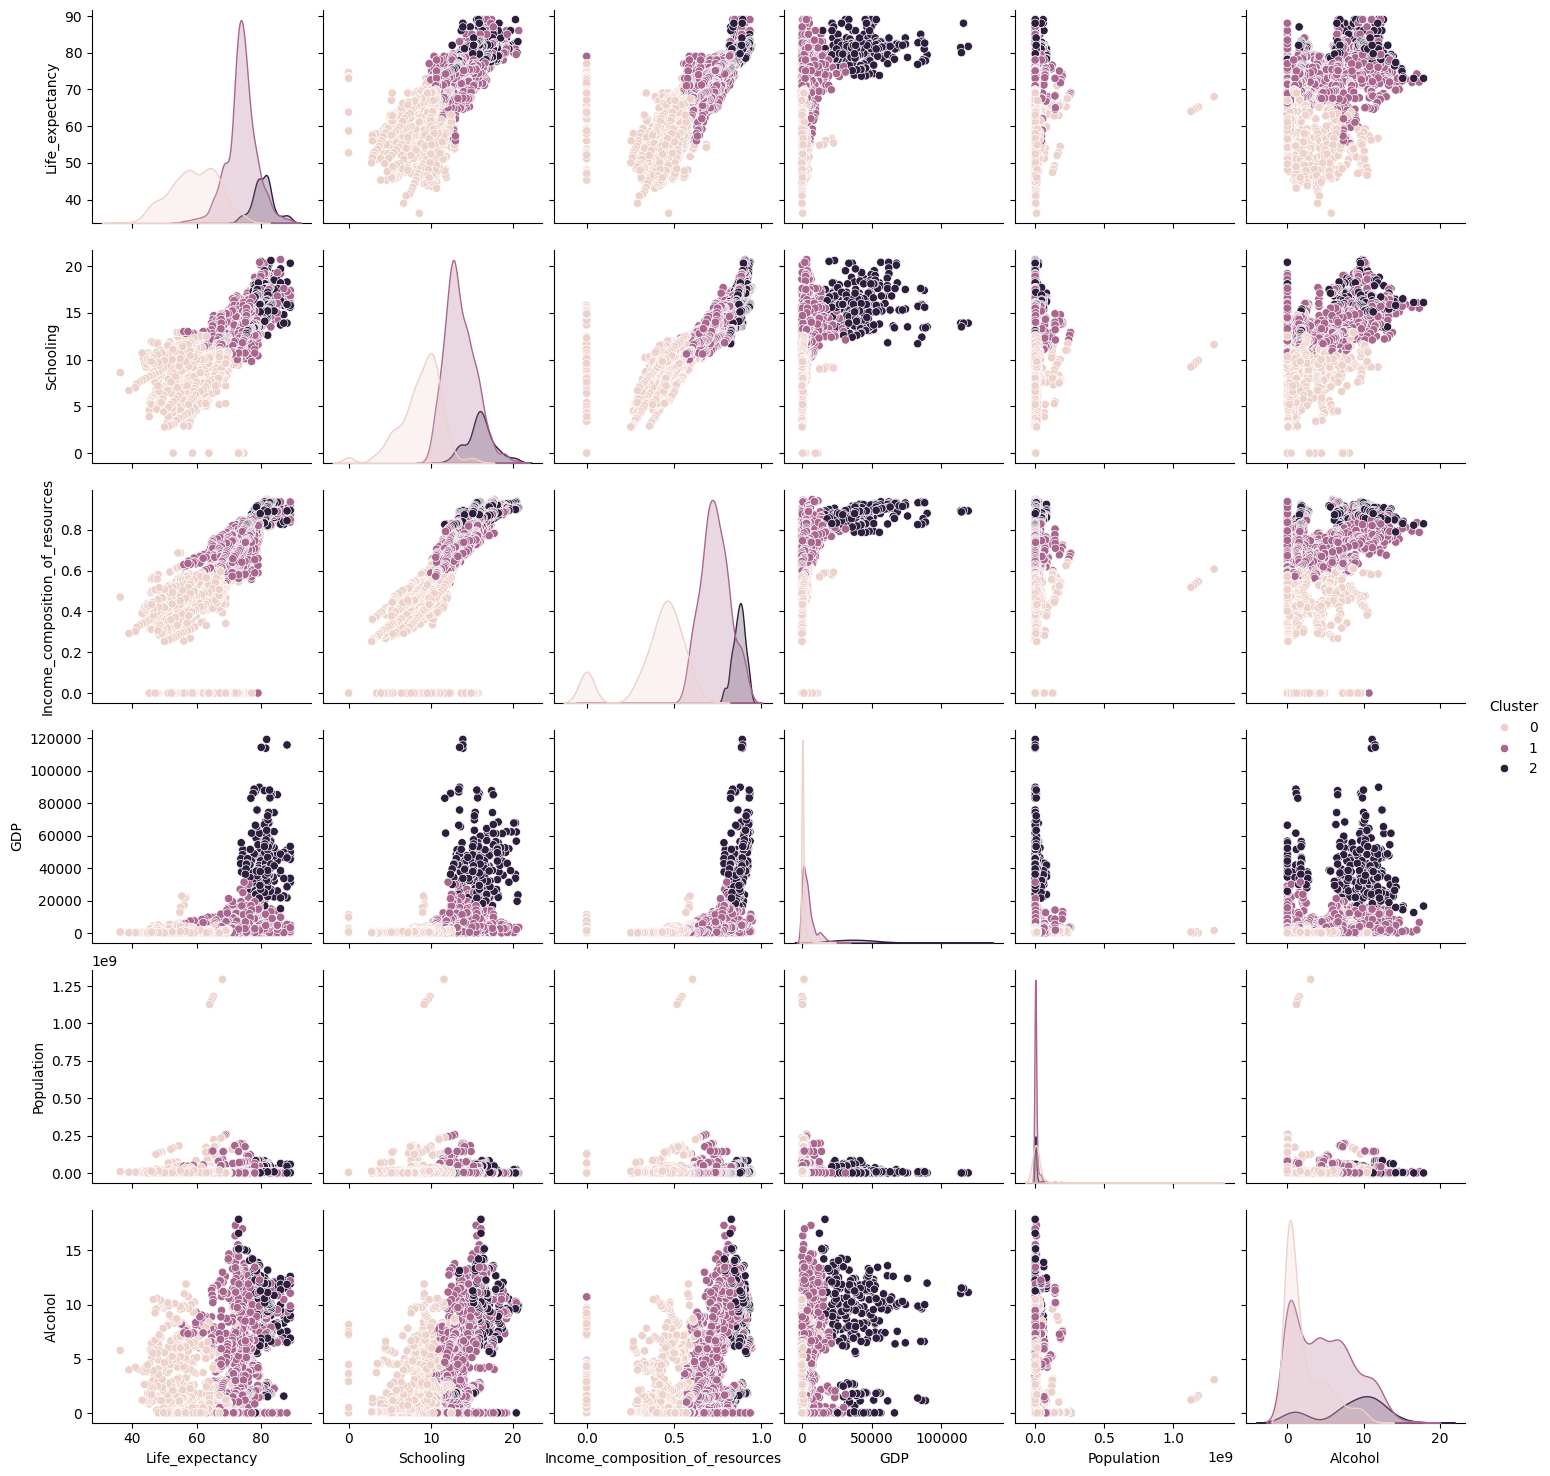

In [55]:
# Calculate mean values for each cluster, including only numeric columns
cluster_means = df1.groupby('Cluster')[numeric_columns].mean()

print("Cluster Means:")
print(cluster_means)

# Visualize clusters using a pair plot
sns.pairplot(df1, hue='Cluster', vars=numeric_columns)
plt.show()

# 4. Display Countries in Each Cluster:

In [56]:
# Display countries in each cluster
for cluster in sorted(df1['Cluster'].unique()):
    print(f"\nCountries in Cluster {cluster}:")
    print(df1[df1['Cluster'] == cluster]['Country'].unique())


Countries in Cluster 0:
['Afghanistan' 'Angola' 'Antigua and Barbuda' 'Azerbaijan' 'Bangladesh'
 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Djibouti' 'Equatorial Guinea' 'Eritrea' 'Ethiopia'
 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iraq' 'Kenya' 'Kiribati'
 'Lebanon' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia'
 'Nepal' 'Niger' 'Nigeria' 'Oman' 'Pakistan' 'Papua New Guinea' 'Rwanda'
 'Sao Tome and Principe' 'Senegal' 'Seychelles' 'Sierra Leone'
 'Solomon Islands' 'Somalia' 'South Africa' 'Suriname' 'Swaziland'
 'Tajikistan' 'Timor-Leste' 'Togo' 'Turkmenistan' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Zambia' 'Zimbabwe']

Countries in Cluster 1:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia'

# Life Expectancy Trends in Each Cluster

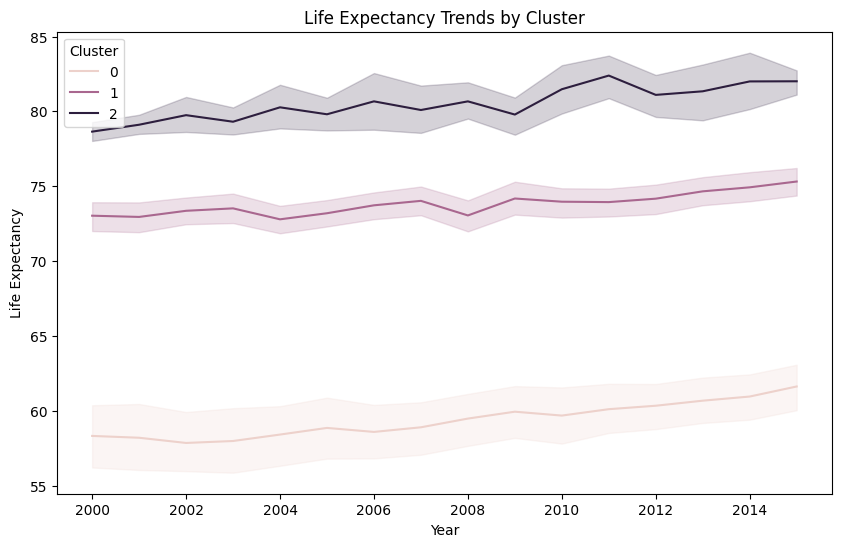

In [57]:
# Trend analysis for Life Expectancy over time for each cluster
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Year', y='Life_expectancy', hue='Cluster')
plt.title('Life Expectancy Trends by Cluster')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


# CORRELATION ANALYSIS FOR EACH CLUSTER 

##  Calculate Correlation Matrices for Each Cluster

In [58]:

# Assuming `df1` is your dataframe and `numeric_columns` are your numeric variables
clusters = df1['Cluster'].unique()

# Create a dictionary to store correlation matrices
cluster_correlations = {}

for cluster in clusters:
    cluster_data = df1[df1['Cluster'] == cluster][numeric_columns]
    correlation_matrix = cluster_data.corr()
    cluster_correlations[cluster] = correlation_matrix

# Print correlation matrices for each cluster
for cluster, corr_matrix in cluster_correlations.items():
    print(f"Correlation Matrix for Cluster {cluster}:")
    print(corr_matrix)
    print("\n")


Correlation Matrix for Cluster 0:
                                 Life_expectancy  Schooling  \
Life_expectancy                                1          0   
Schooling                                      0          1   
Income_composition_of_resources               -0          0   
GDP                                            0          0   
Population                                     0          0   
Alcohol                                       -0          0   

                                 Income_composition_of_resources  GDP  \
Life_expectancy                                               -0    0   
Schooling                                                      0    0   
Income_composition_of_resources                                1   -0   
GDP                                                           -0    1   
Population                                                     0   -0   
Alcohol                                                       -0    0   

            

## Visualize Correlation Matrices Using Heatmaps

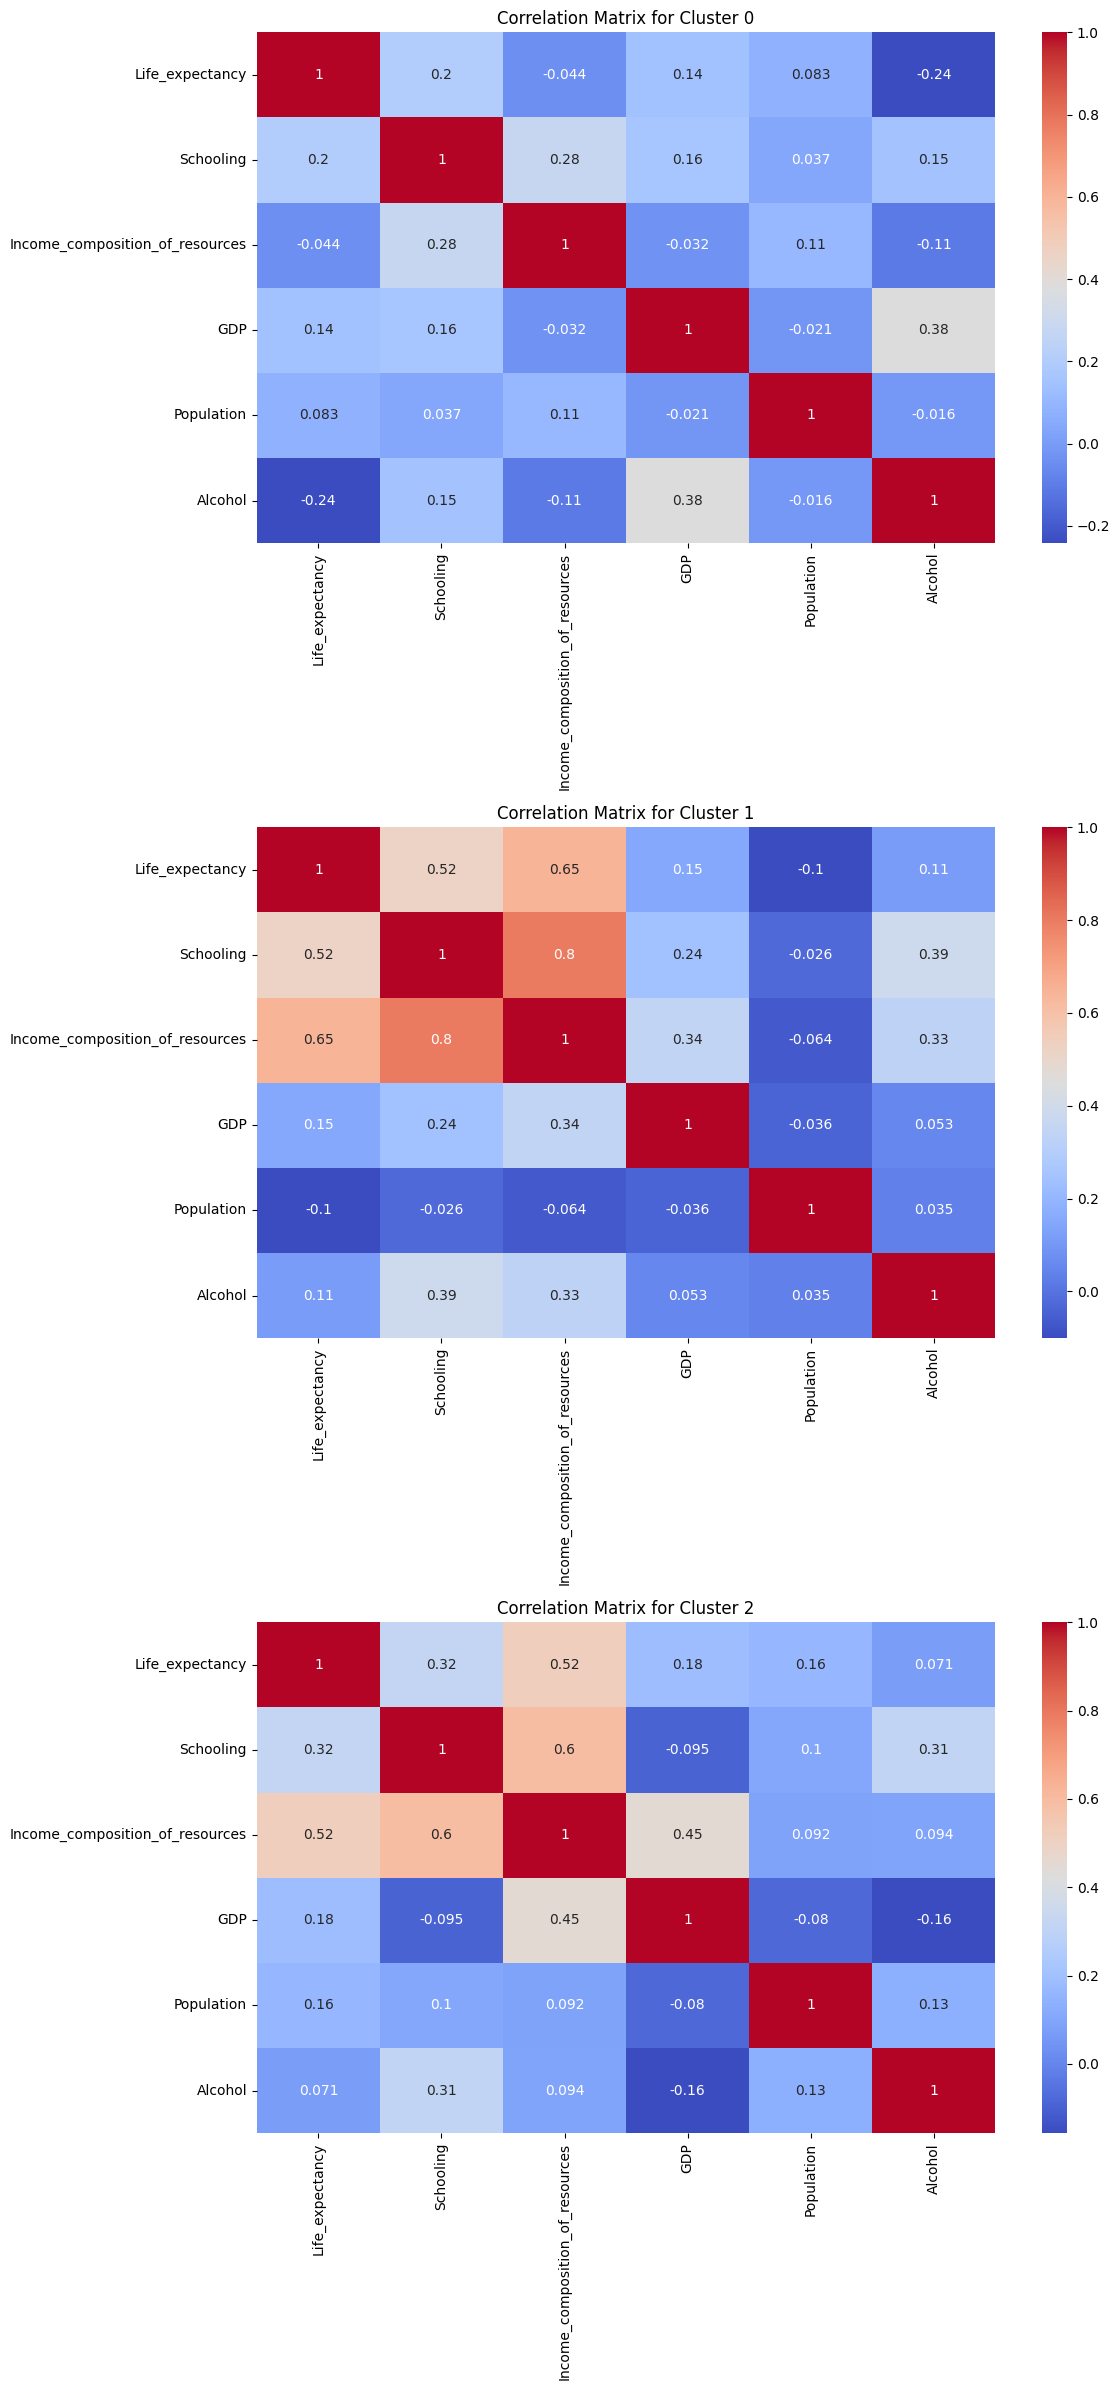

In [59]:
# Plot heatmaps for correlation matrices of each cluster
fig, axes = plt.subplots(len(clusters), 1, figsize=(12, 8 * len(clusters)))

for i, cluster in enumerate(clusters):
    sns.heatmap(cluster_correlations[cluster], annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for Cluster {cluster}')

plt.tight_layout()
plt.show()


# ANALYSIS FOR THE INDIA SPECIFICALLY

In [60]:

# Filter data for India
df_india = df1[df1['Country'] == 'India']

# Display the first few rows to verify
df_india.head(16)

Country Continent  Year      Status  Life_expectancy  Adult_Mortality  \
1036   India      Asia  2015  Developing               68              181   
1037   India      Asia  2014  Developing               68              184   
1038   India      Asia  2013  Developing               68              187   
1039   India      Asia  2012  Developing               67               19   
1040   India      Asia  2011  Developing               67              193   
1041   India      Asia  2010  Developing               66              196   
1042   India      Asia  2009  Developing               66                2   
1043   India      Asia  2008  Developing               66               23   
1044   India      Asia  2007  Developing               65               26   
1045   India      Asia  2006  Developing               65               28   
1046   India      Asia  2005  Developing               64              211   
1047   India      Asia  2004  Developing               64              214   
1048   India      Asia  2003  Developing               64              216   
1049   India      Asia  2002  Developing               63              219   
1050   India      Asia  2001  Developing               63              222   
1051   India      Asia  2000  Developing               62              224   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  ...  \
1036            910        0                       0           87  ...   
1037            957        3                      87           79  ...   
1038           1000        3                      68            7  ...   
1039           1100        3                      65           73  ...   
1040           1100        3                      65           44  ...   
1041           1200        3                      58           38  ...   
1042           1300        2                       1           37  ...   
1043           1300        2                      43           29  ...   
1044           1400        2                       5            6  ...   
1045           1500        1                      35            6  ...   
1046           1500        1                       4            8  ...   
1047           1600        1                      27            6  ...   
1048           1700        1                      19           92  ...   
1049           1700        1                      18           92  ...   
1050           1800        1                      19           92  ...   
1051           1800        1                      19           92  ...   

      Total_expenditure  Diphtheria  HIV/AIDS   GDP    Population  \
1036                  6          87         0 1,613     1,395,398   
1037                  5          85         0 1,573 1,293,859,294   
1038                  5          83         0 1,452   127,856,227   
1039                  4          82         0 1,447   126,365,852   
1040                  4          82         0 1,462   124,723,629   
1041                  4          79         0 1,346    12,398,691   
1042                  4          74         0    19   121,427,132   
1043                  4           7         0   991   119,714,696   
1044                  4          64         0   118 1,179,681,239   
1045                  4          65         0   792 1,161,977,719   
1046                  4          65         0    78 1,144,118,674   
1047                  4          63         0   621 1,126,135,777   
1048                  4          61         0   541    11,827,848   
1049                  4          59         0   466    18,987,112   
1050                  4          59         0   447   171,477,855   
1051                  4          58         0   439     1,535,912   

      thinness  1-19 years  thinness 5-9 years  \
1036                    27                  27   
1037                    27                  27   
1038                    27                  28   
1039                    27                  2

## Descriptive Statistics About Only India

In [61]:
df_india.describe()



Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
count    16               16               16             16       16   
mean  2,008               65              147          1,367        2   
std       5                2               90            303        1   
min   2,000               62                2            910        0   
25%   2,004               64               28          1,100        1   
50%   2,008               65              190          1,350        1   
75%   2,011               67              214          1,625        3   
max   2,015               68              224          1,800        3   

       percentage_expenditure  Hepatitis_B  Measles  BMI  under_five_deaths  \
count                      16           16       16   16                 16   
mean                       33           49   46,454   15              1,812   
std                        28           37   19,997    2                435   
min                         0            6   13,822   11              1,100   
25%                        15            8   35,942   13              1,475   
50%                        23           41   42,701   15              1,850   
75%                        59           88   55,629   17              2,125   
max                        87           92   90,387   19              2,500   

       ...  Total_expenditure  Diphtheria  HIV/AIDS   GDP    Population  \
count  ...                 16          16        16    16            16   
mean   ...                  4          67         0   838   421,467,691   
std    ...                  0          19         0   572   532,788,375   
min    ...                  4           7         0    19     1,395,398   
25%    ...                  4          60         0   445    17,340,007   
50%    ...                  4          65         0   707   125,544,740   
75%    ...                  4          82         0 1,448 1,130,631,501   
max    ...                  6          87         0 1,613 1,293,859,294   

       thinness  1-19 years  thinness 5-9 years  \
count                    16                  16   
mean                     27                  28   
std                       0                   0   
min                      27                  27   
25%                      27                  28   
50%                      27                  28   
75%                      27                  28   
max                      28                  29   

       Income_composition_of_resources  Schooling  Cluster  
count                               16         16       16  
mean                                 1         10        0  
std                                  0          1        0  
min                                  0          8        0  
25%                                  1          9        0  
50%                                  1         10        0  
75%                                  1         11        0  
max                                  1         12        1  

[8 rows x 21 columns]

# Perform TREND Analysis
## Life Expectancy Over Time

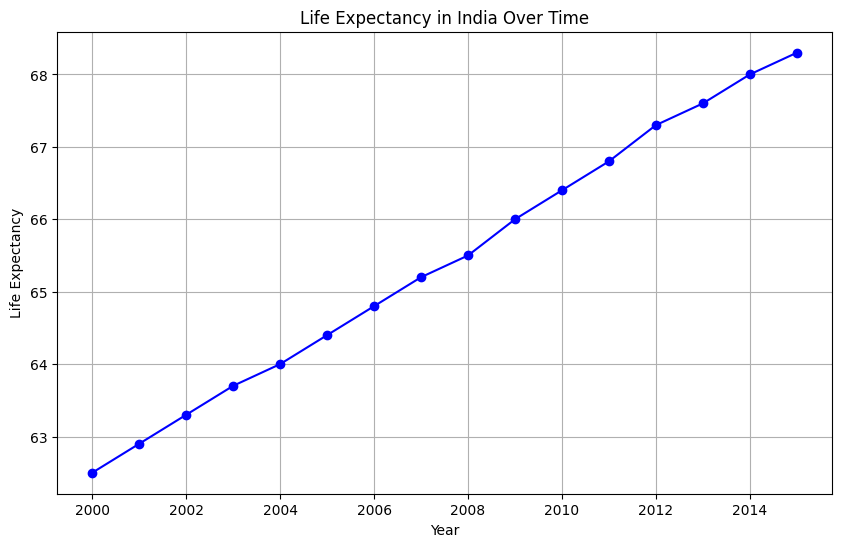

In [62]:

# Line plot of Life Expectancy over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['Life_expectancy'], marker='o', linestyle='-', color='b')
plt.title('Life Expectancy in India Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


## GDP Over Time

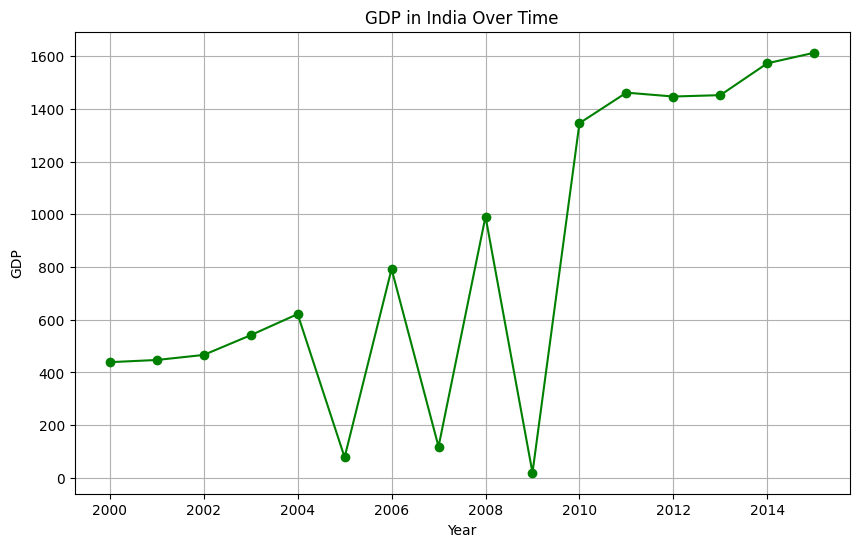

In [63]:
# Line plot of GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['GDP'], marker='o', linestyle='-', color='g')
plt.title('GDP in India Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()


## Health Indicators Over Time (e.g., Alcohol Consumption)

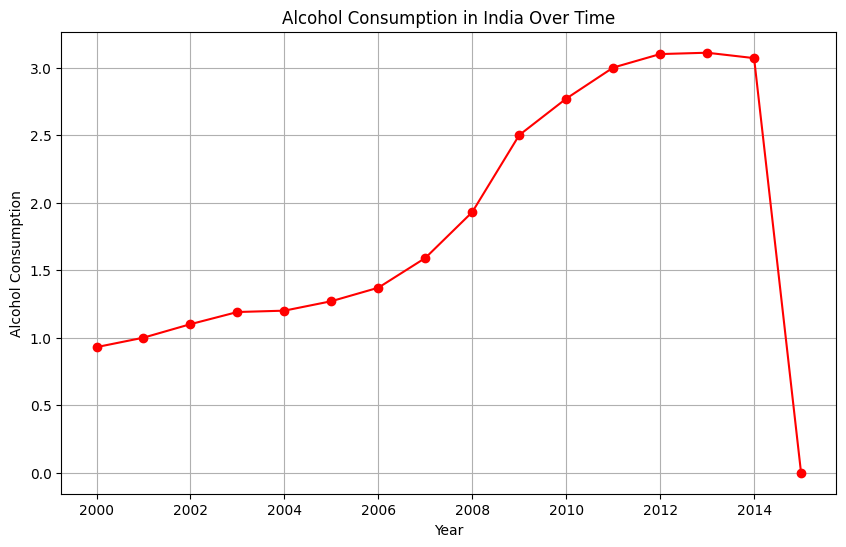

In [64]:
# Line plot of Alcohol consumption over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['Alcohol'], marker='o', linestyle='-', color='r')
plt.title('Alcohol Consumption in India Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.grid(True)
plt.show()


## Analyzing Infant Mortality Rate

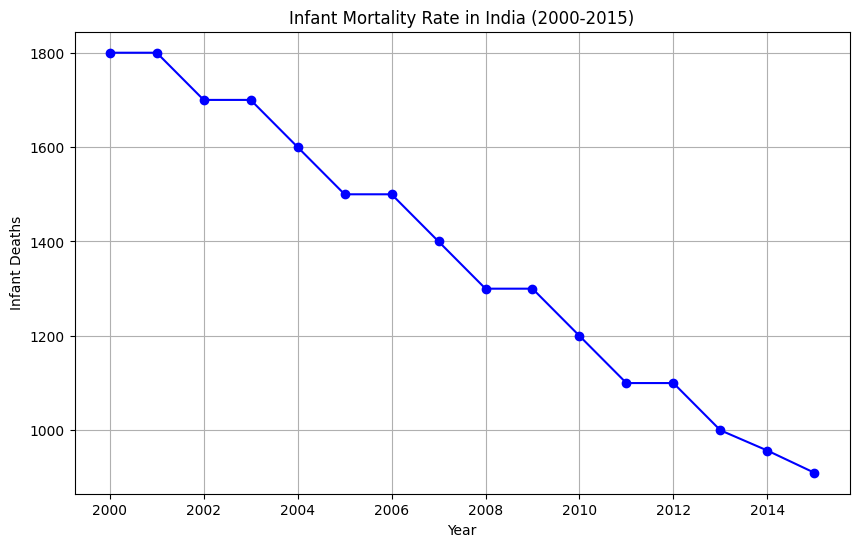

In [65]:


# Plotting Infant Mortality Rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['infant_deaths'], marker='o', linestyle='-', color='b')
plt.title('Infant Mortality Rate in India (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Infant Deaths')
plt.grid(True)
plt.show()


## Analyzing Hepatitis B Vaccination Coverage

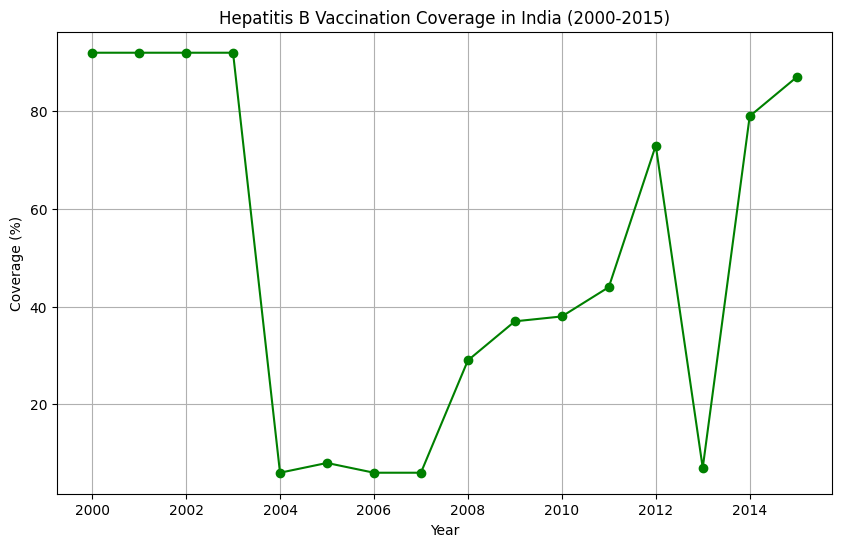

In [66]:
# Plotting Hepatitis B vaccination coverage over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['Hepatitis_B'], marker='o', linestyle='-', color='g')
plt.title('Hepatitis B Vaccination Coverage in India (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.show()


## Analyzing HIV/AIDS Prevalence

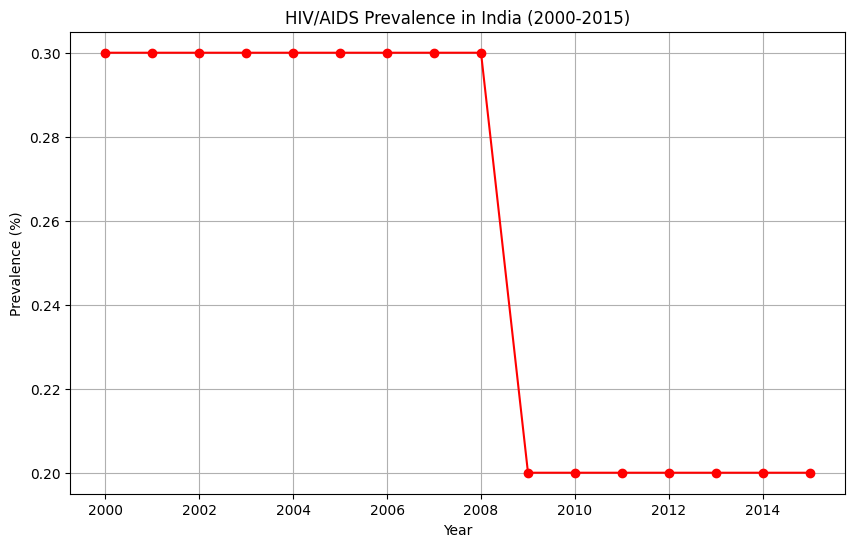

In [67]:
# Plotting HIV/AIDS prevalence over time
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['HIV/AIDS'], marker='o', linestyle='-', color='r')
plt.title('HIV/AIDS Prevalence in India (2000-2015)')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.grid(True)
plt.show()


#  Comparative Analysis

##  Comparison with Global or Regional Averages

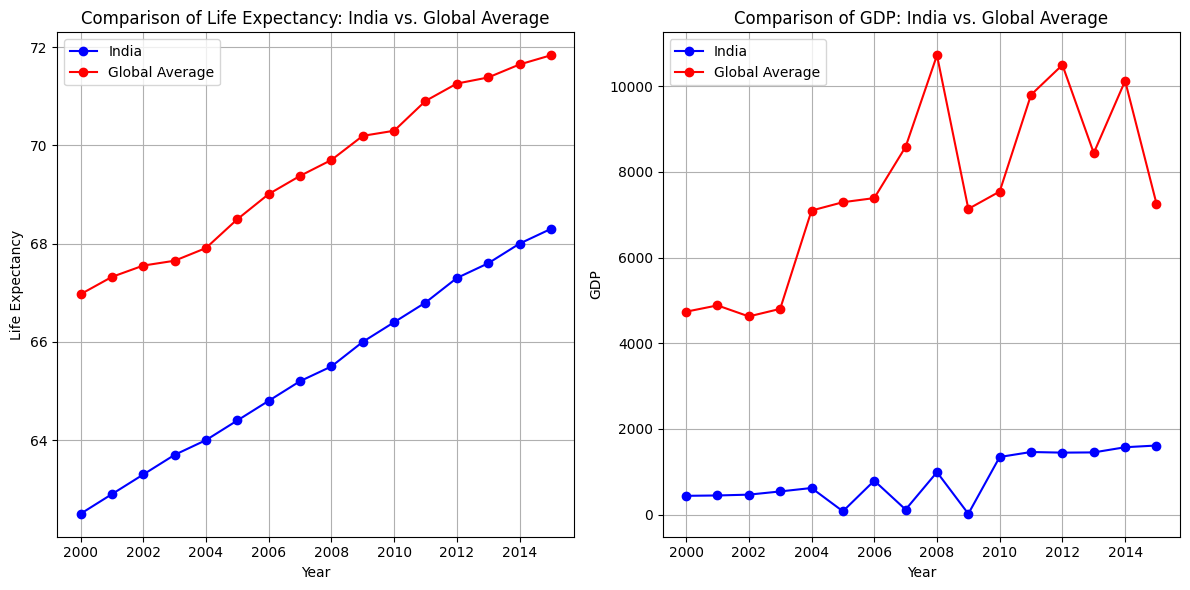

In [68]:

# Calculate global or regional averages for life expectancy and GDP
global_average_life_expectancy = df1.groupby('Year')['Life_expectancy'].mean()
global_average_gdp = df1.groupby('Year')['GDP'].mean()

# Plotting comparison with global averages
plt.figure(figsize=(12, 6))

# Plot for Life Expectancy
plt.subplot(1, 2, 1)
plt.plot(df_india['Year'], df_india['Life_expectancy'], label='India', marker='o', linestyle='-', color='b')
plt.plot(global_average_life_expectancy.index, global_average_life_expectancy.values, label='Global Average', marker='o', linestyle='-', color='r')
plt.title('Comparison of Life Expectancy: India vs. Global Average')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)

# Plot for GDP
plt.subplot(1, 2, 2)
plt.plot(df_india['Year'], df_india['GDP'], label='India', marker='o', linestyle='-', color='b')
plt.plot(global_average_gdp.index, global_average_gdp.values, label='Global Average', marker='o', linestyle='-', color='r')
plt.title('Comparison of GDP: India vs. Global Average')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Comparison with Similar Countries

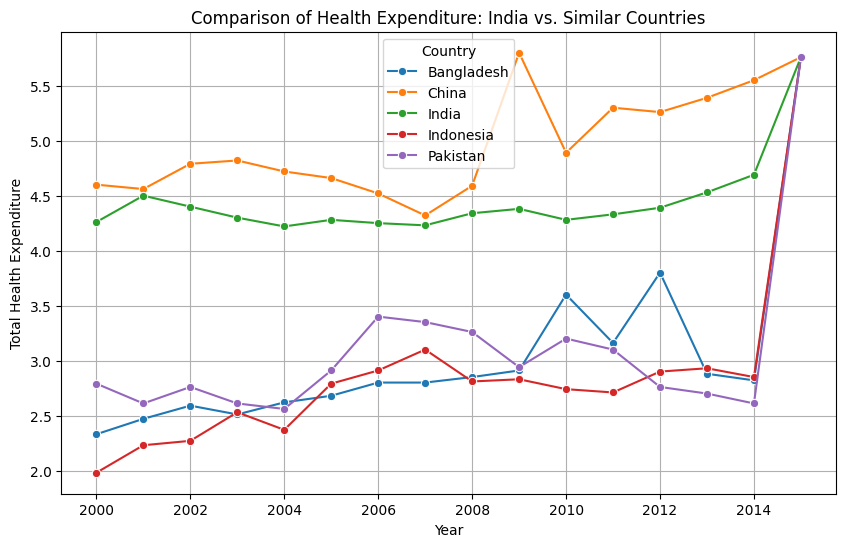

In [69]:

# Selecting similar countries based on demographic or economic similarities
similar_countries = ['Bangladesh', 'Pakistan', 'Indonesia', 'China']

# Filter data for India and similar countries
df_similar = df1[df1['Country'].isin([*similar_countries, 'India'])]

# Plotting comparison of health expenditure
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_expenditure', hue='Country', data=df_similar, marker='o')
plt.title('Comparison of Health Expenditure: India vs. Similar Countries')
plt.xlabel('Year')
plt.ylabel('Total Health Expenditure')
plt.grid(True)
plt.show()


##  Correlation Analysis For India

Correlation Matrix:
                 Life_expectancy  GDP  Alcohol  Schooling
Life_expectancy                1    1        1          1
GDP                            1    1        0          1
Alcohol                        1    0        1          1
Schooling                      1    1        1          1


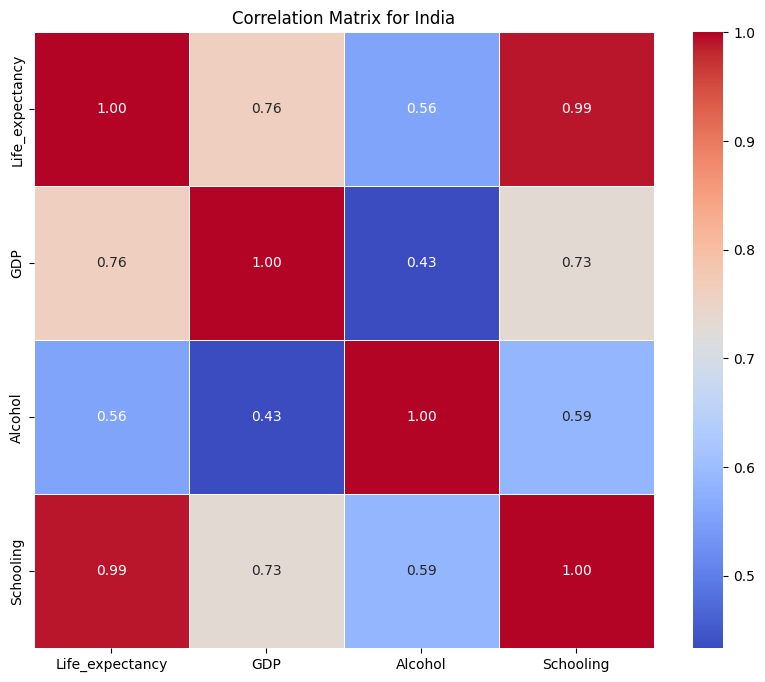

In [70]:
correlation_matrix = df_india[['Life_expectancy', 'GDP', 'Alcohol', 'Schooling']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for India')
plt.show()


# THANK YOU GUYSS..........
## I HOPE YOU LIKE IT............